# Final exam DAL
# Anik Bhowmick, AE20B102

In [458]:
!pip install pmdarima
!pip install mplfinance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import plotly.graph_objects as go
from matplotlib import colormaps
from functools import reduce
import copy
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.utils import plot_model

In [459]:
Data_cognizant=pd.read_csv(r'/content/drive/MyDrive/DAL dataset/Endsem stock price prediction/Cognizant share prices 2019_2021.csv')
Data_HCL=pd.read_csv(r'/content/drive/MyDrive/DAL dataset/Endsem stock price prediction/HCL Technologies share prices 2019_2021.csv')
Data_HDFC=pd.read_csv(r'/content/drive/MyDrive/DAL dataset/Endsem stock price prediction/HDFC Bank Share Prices 2019_2021.csv')
Data_ICICI=pd.read_csv(r'/content/drive/MyDrive/DAL dataset/Endsem stock price prediction/ICICI Bank Share Prices 2019_2021.csv')
Data_Infosys=pd.read_csv(r'/content/drive/MyDrive/DAL dataset/Endsem stock price prediction/Infosys Share Prices 2019_2021.csv')
Data_SBI=pd.read_csv(r'/content/drive/MyDrive/DAL dataset/Endsem stock price prediction/SBI Share Prices 2019_2021.csv')
Data_Curr_exchange=pd.read_csv(r'/content/drive/MyDrive/DAL dataset/Endsem stock price prediction/USD-INR Exchange rate 2019_2021.csv')

In [460]:
#Utility functions
def set_index_as_column(Data):
  Data=Data.set_index('Date')
  Data.index=pd.to_datetime(Data.index)
  return Data
def get_info(Data):
  Data.info()
def get_statdescr(Data):
  Data.describe()

In [461]:
get_info(Data_cognizant)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    694 non-null    object 
 1   Open    694 non-null    float64
 2   High    694 non-null    float64
 3   Low     694 non-null    float64
 4   Close   694 non-null    float64
 5   Volume  694 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 32.7+ KB


In [462]:
Data_cognizant=set_index_as_column(Data_cognizant)

In [463]:
get_info(Data_HCL)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    249 non-null    object 
 1   Open    248 non-null    float64
 2   High    248 non-null    float64
 3   Low     248 non-null    float64
 4   Close   248 non-null    float64
 5   Volume  248 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.8+ KB


In [464]:
Data_HCL=set_index_as_column(Data_HCL)
Data_HCL[Data_HCL.isnull().any(axis=1)]#This is saturday, stock markets remain closed. So drop it

Open  High  Low  Close  Volume
Date                                      
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [465]:
Data_HCL.dropna(inplace=True)
Data_HCL.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [466]:
get_info(Data_HDFC)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    680 non-null    object 
 1   Open    678 non-null    float64
 2   High    678 non-null    float64
 3   Low     678 non-null    float64
 4   Close   678 non-null    float64
 5   Volume  678 non-null    float64
dtypes: float64(5), object(1)
memory usage: 32.0+ KB


In [467]:
Data_HDFC=set_index_as_column(Data_HDFC)
Data_HDFC[Data_HDFC.isnull().any(axis=1)]# These are wrong entries for saturday and sunday. Stock markets remain closed on saturday and sunday. So just get rid of them by dropping.

Open  High  Low  Close  Volume
Date                                      
2019-10-27   NaN   NaN  NaN    NaN     NaN
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [468]:
Data_HDFC.dropna(inplace=True)
Data_HDFC.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [469]:
get_info(Data_ICICI)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    680 non-null    object 
 1   Open    678 non-null    float64
 2   High    678 non-null    float64
 3   Low     678 non-null    float64
 4   Close   678 non-null    float64
 5   Volume  678 non-null    float64
dtypes: float64(5), object(1)
memory usage: 32.0+ KB


In [470]:
Data_ICICI=set_index_as_column(Data_ICICI)
Data_ICICI[Data_ICICI.isnull().any(axis=1)]# These are wrong entries for saturday and sunday. Stock markets remain closed on saturday and sunday. So just get rid of them by dropping.

Open  High  Low  Close  Volume
Date                                      
2019-10-27   NaN   NaN  NaN    NaN     NaN
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [471]:
Data_ICICI.dropna(inplace=True)
Data_ICICI.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [472]:
get_info(Data_Infosys)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    249 non-null    object 
 1   Open    248 non-null    float64
 2   High    248 non-null    float64
 3   Low     248 non-null    float64
 4   Close   248 non-null    float64
 5   Volume  248 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.8+ KB


In [473]:
Data_Infosys=set_index_as_column(Data_Infosys)
Data_Infosys[Data_Infosys.isnull().any(axis=1)]

Open  High  Low  Close  Volume
Date                                      
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [474]:
Data_Infosys.dropna(inplace=True)
Data_Infosys.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [475]:
get_info(Data_SBI)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    680 non-null    object 
 1   Open    678 non-null    float64
 2   High    678 non-null    float64
 3   Low     678 non-null    float64
 4   Close   678 non-null    float64
 5   Volume  678 non-null    float64
dtypes: float64(5), object(1)
memory usage: 32.0+ KB


In [476]:
Data_SBI=set_index_as_column(Data_SBI)
Data_SBI[Data_SBI.isnull().any(axis=1)]

Open  High  Low  Close  Volume
Date                                      
2019-10-27   NaN   NaN  NaN    NaN     NaN
2020-11-14   NaN   NaN  NaN    NaN     NaN

In [477]:
Data_SBI.dropna(inplace=True)
Data_SBI.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [478]:
get_info(Data_Curr_exchange)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       720 non-null    object 
 1   Open       699 non-null    float64
 2   High       699 non-null    float64
 3   Low        699 non-null    float64
 4   Close      699 non-null    float64
 5   Adj Close  699 non-null    float64
dtypes: float64(5), object(1)
memory usage: 33.9+ KB


In [479]:
Data_Curr_exchange=set_index_as_column(Data_Curr_exchange)
Data_Curr_exchange[Data_Curr_exchange.isnull().any(axis=1)]#Useless to keep, drop all of them. no imputation can work with these many missing entries in a row.

Open  High  Low  Close  Adj Close
Date                                         
2019-05-22   NaN   NaN  NaN    NaN        NaN
2019-09-11   NaN   NaN  NaN    NaN        NaN
2019-09-12   NaN   NaN  NaN    NaN        NaN
2019-09-13   NaN   NaN  NaN    NaN        NaN
2019-09-16   NaN   NaN  NaN    NaN        NaN
2019-09-17   NaN   NaN  NaN    NaN        NaN
2019-09-18   NaN   NaN  NaN    NaN        NaN
2019-09-19   NaN   NaN  NaN    NaN        NaN
2019-09-20   NaN   NaN  NaN    NaN        NaN
2019-09-23   NaN   NaN  NaN    NaN        NaN
2019-09-24   NaN   NaN  NaN    NaN        NaN
2019-09-25   NaN   NaN  NaN    NaN        NaN
2019-09-26   NaN   NaN  NaN    NaN        NaN
2019-09-27   NaN   NaN  NaN    NaN        NaN
2019-09-30   NaN   NaN  NaN    NaN        NaN
2019-10-01   NaN   NaN  NaN    NaN        NaN
2019-10-02   NaN   NaN  NaN    NaN        NaN
2019-10-03   NaN   NaN  NaN    NaN        NaN
2019-10-04   NaN   NaN  NaN    NaN        NaN
2019-10-07   NaN   NaN  NaN    NaN        NaN
2019-10-09   NaN   NaN  NaN    NaN        NaN

In [480]:
Data_Curr_exchange.dropna(inplace=True)

## Exploratory data analysis

In [481]:
#Get the candle stick plot
def plot_candle_stick(Data,text):
  fig = go.Figure(data=[go.Candlestick(x=Data.index,
                open=Data['Open'],
                high=Data['High'],
                low=Data['Low'],
                close=Data['Close'])])
  fig.update_layout(
    title=text,
    title_font=dict(size=30),
    title_x=0.5,
    xaxis_title='Date',
    xaxis_title_font=dict(size=20),
    yaxis_title=r'Stock Price (INR)',
    yaxis_title_font=dict(size=20),xaxis_rangeslider_visible=False,paper_bgcolor='#D1F2EB')
  fig.show()

def get_moving_avg(Data,text):
  mystyle = mpf.make_mpf_style(base_mpf_style='charles',rc={'font.size':30})
  fig,ax=mpf.plot(Data,type='line',mav=(30,50),mavcolors=('orange', 'green'),datetime_format='%Y-%m-%d',volume=True,figsize=(25, 10),returnfig=True,scale_width_adjustment=dict(lines=3),style=mystyle)
  ax[0].legend(['Stock Price','SMA(30)','SMA(50)'],fontsize=30)
  ax[0].set_title(text, fontsize=35)
  #ax[0].tick_params(axis='y', which='both', labelsize=25)
  plt.savefig(f'{text}.png',bbox_inches='tight')
  plt.show()

In [482]:
plot_candle_stick(Data_cognizant,'Cognizant Stock price')

In [483]:
plot_candle_stick(Data_HCL,'HCL Stock price')

In [484]:
plot_candle_stick(Data_HDFC,'HDFC Stock price')

In [485]:
plot_candle_stick(Data_ICICI,'ICICI Stock price')

In [486]:
plot_candle_stick(Data_Infosys,'Infosys Stock price')

In [487]:
plot_candle_stick(Data_SBI,'SBI Stock price')

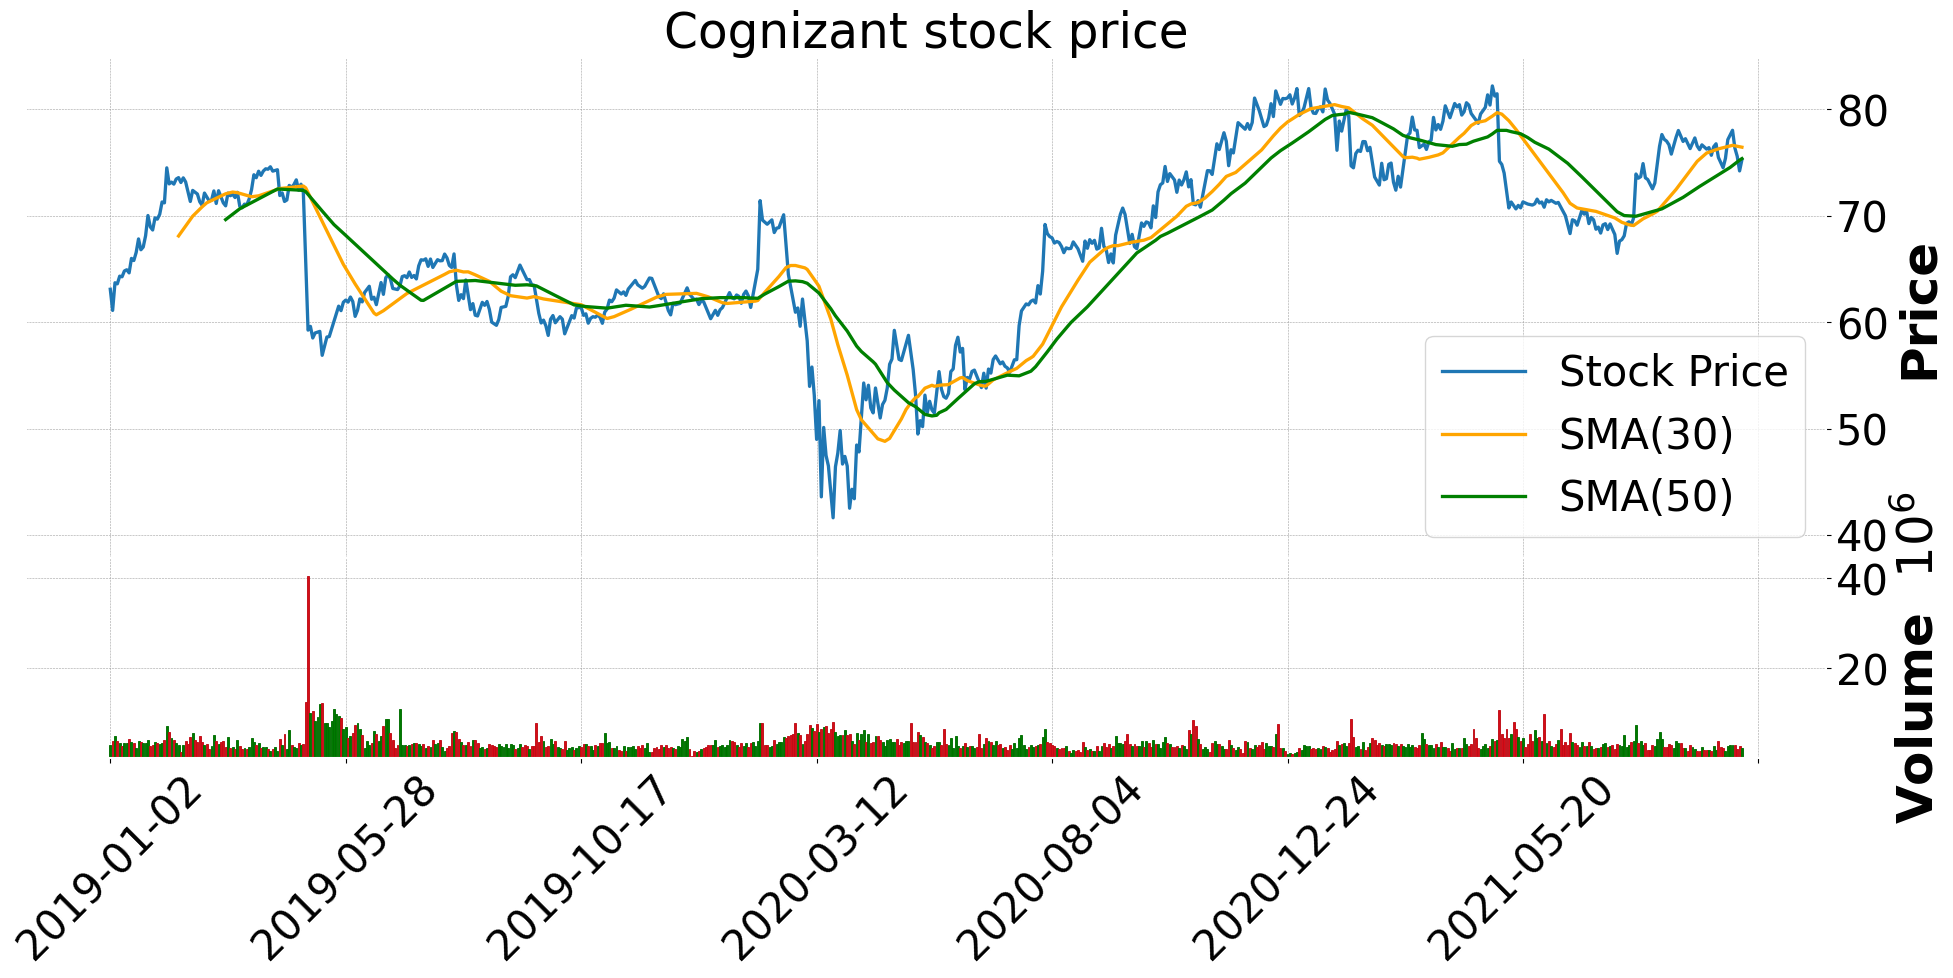

In [488]:
get_moving_avg(Data_cognizant,'Cognizant stock price')

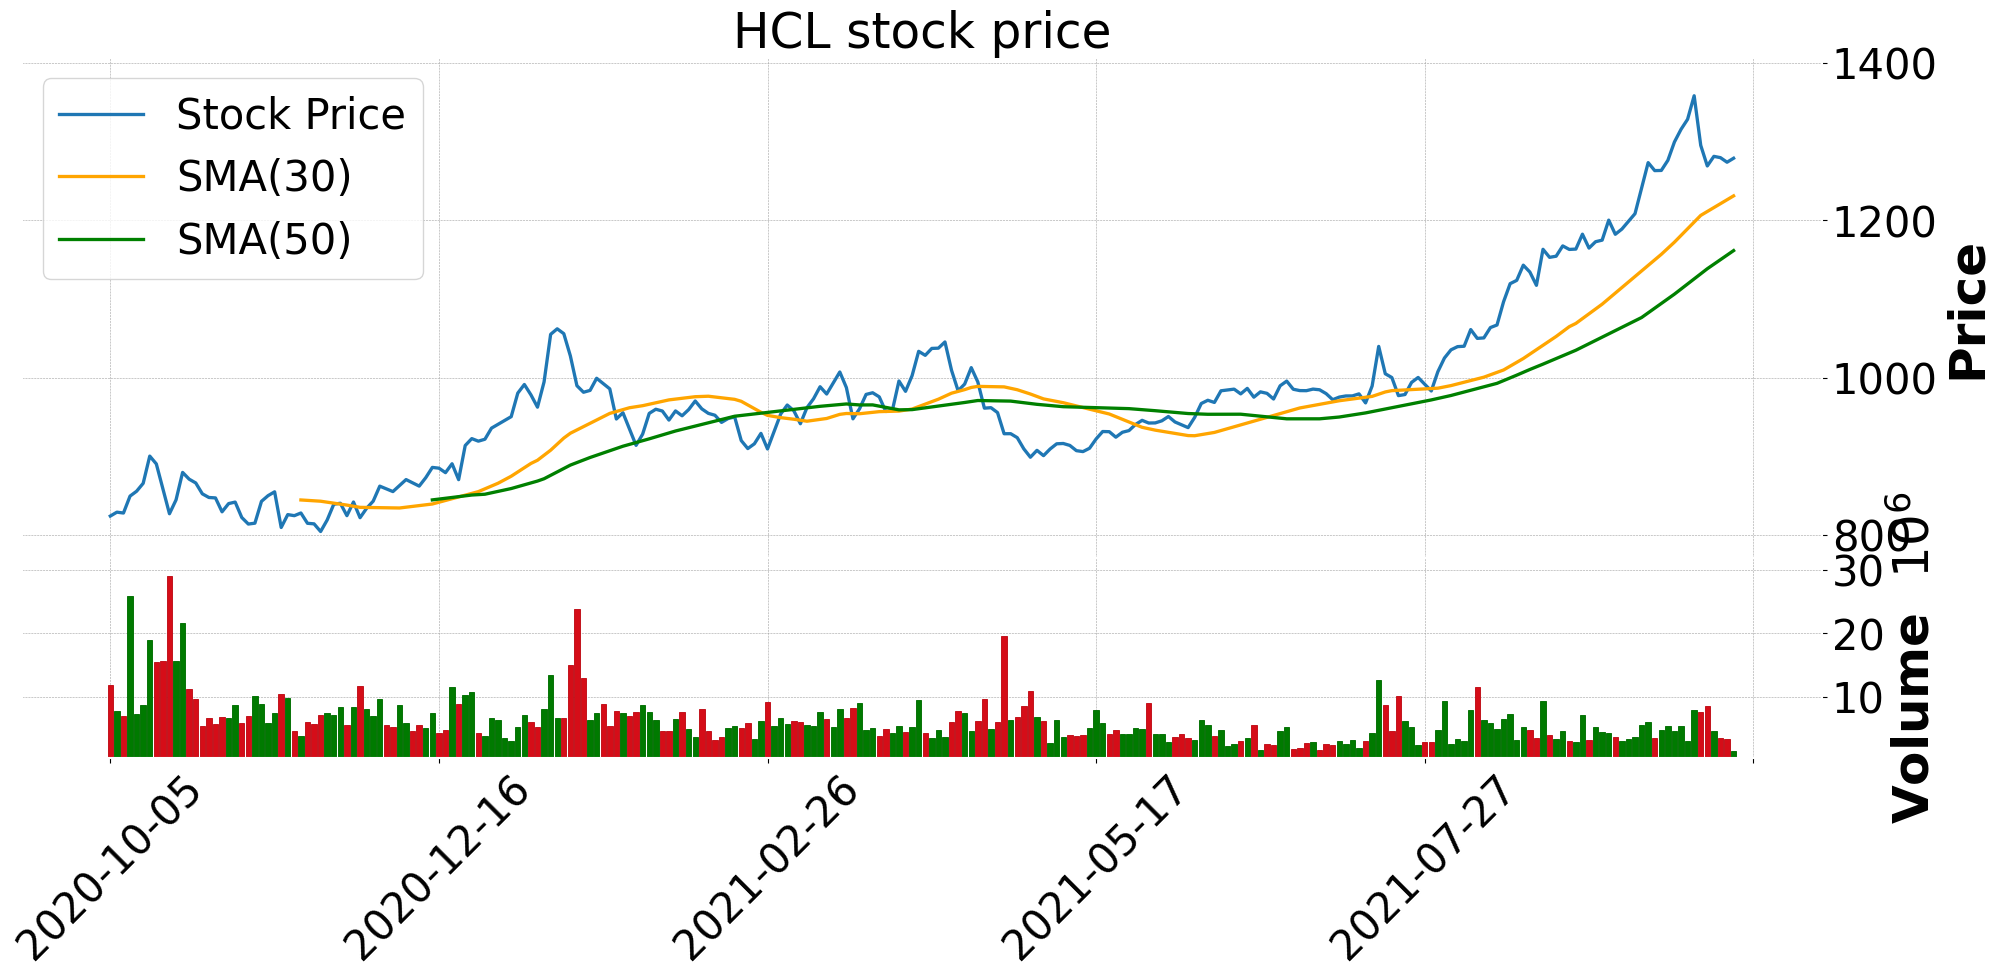

In [489]:
get_moving_avg(Data_HCL,'HCL stock price')

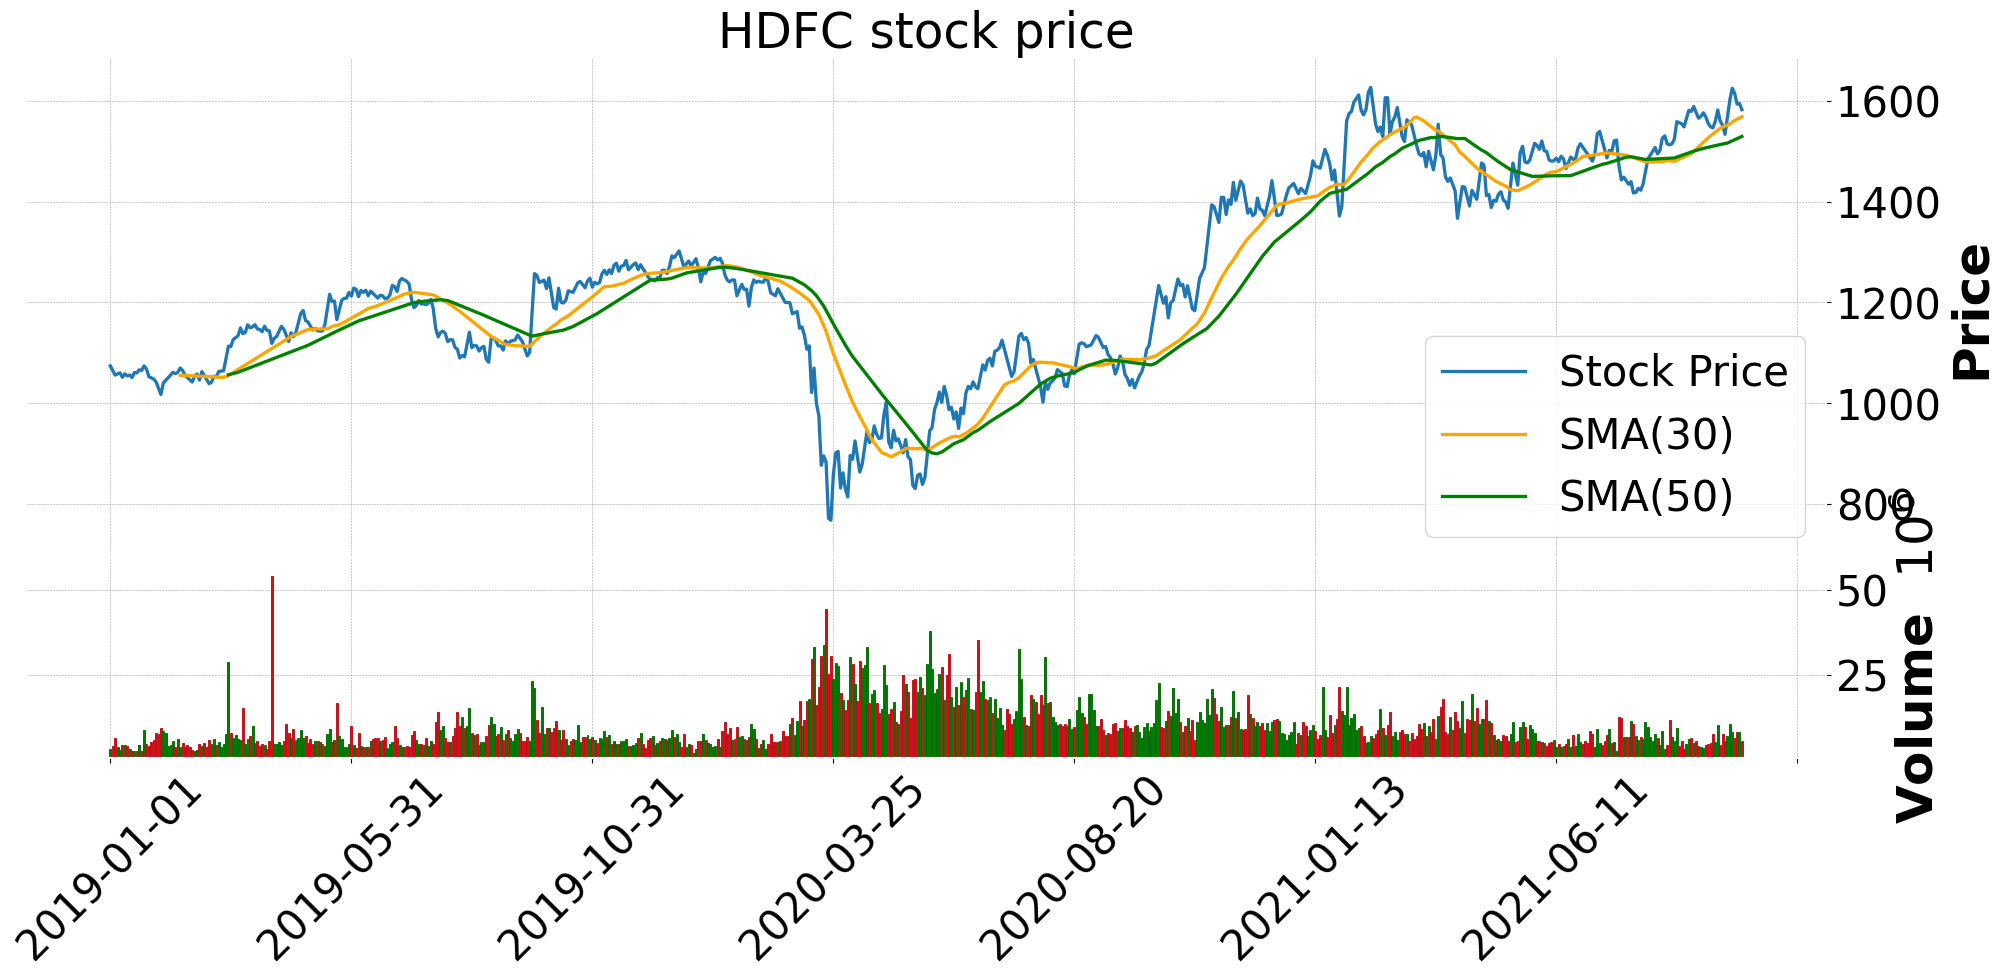

In [490]:
get_moving_avg(Data_HDFC,'HDFC stock price')

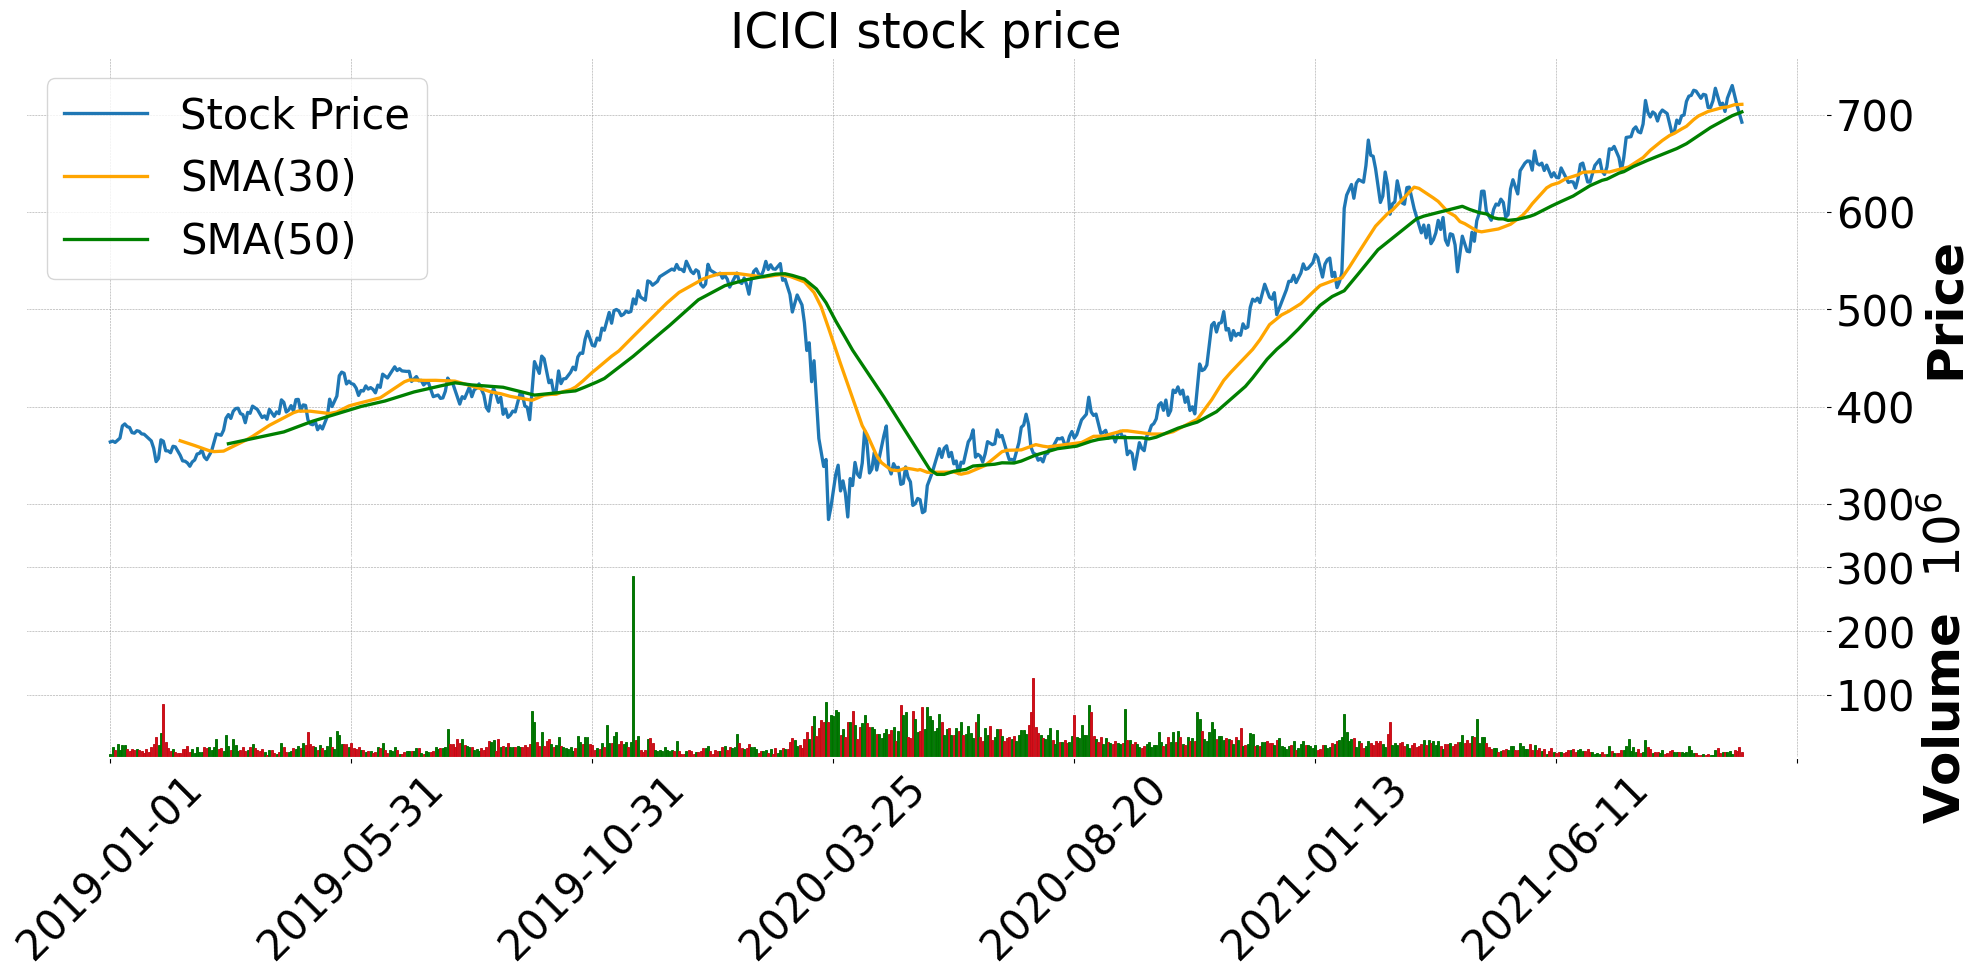

In [491]:
get_moving_avg(Data_ICICI,'ICICI stock price')

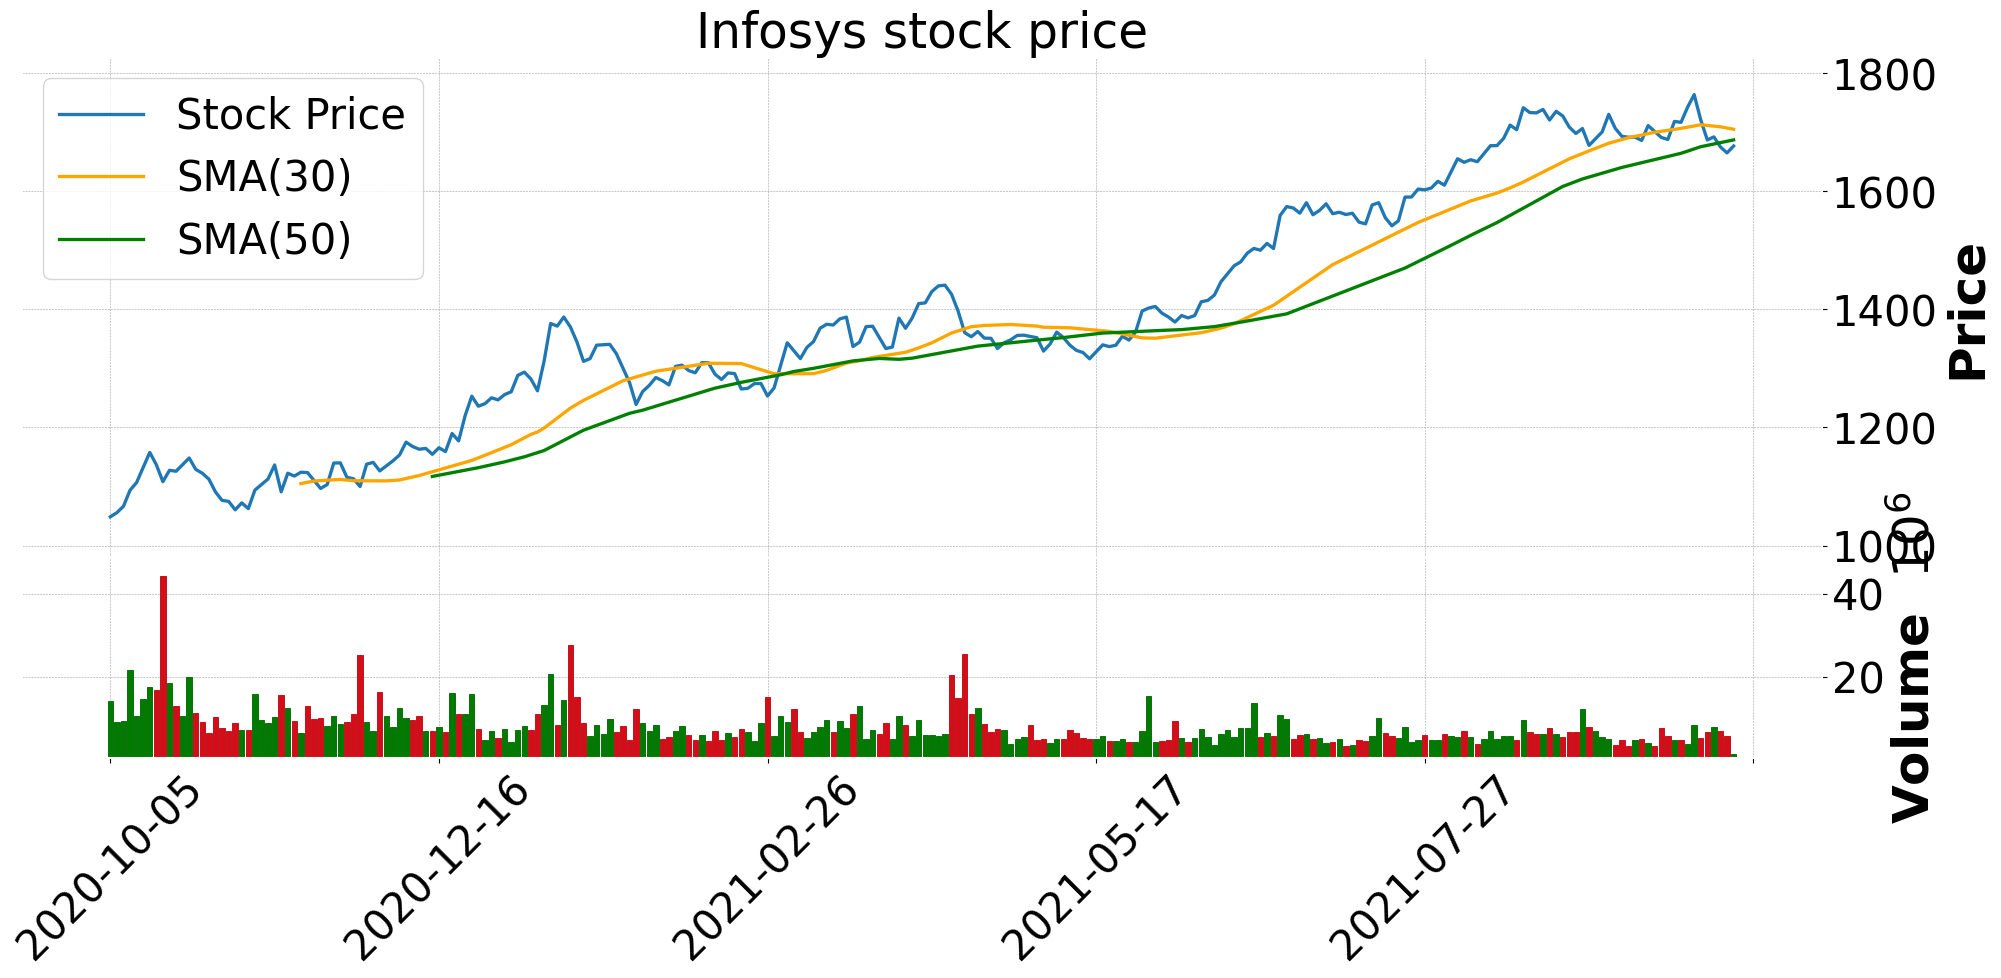

In [492]:
get_moving_avg(Data_Infosys,'Infosys stock price')

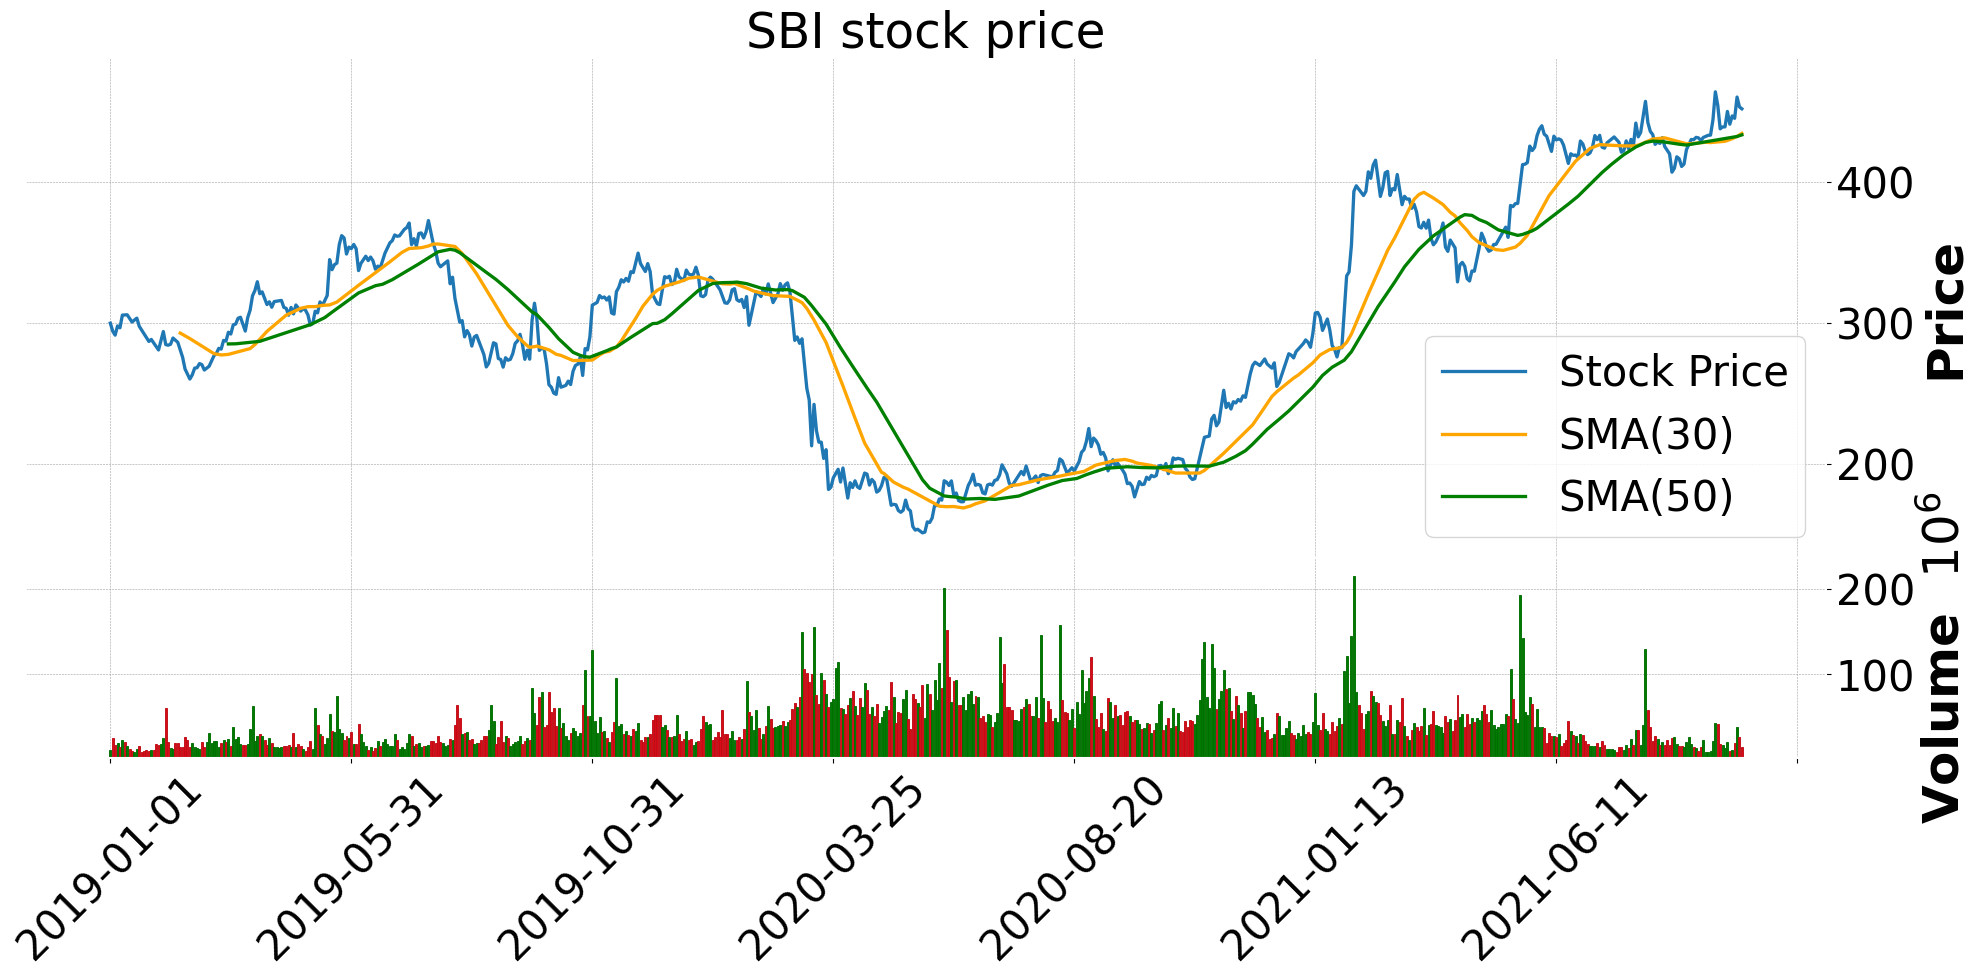

In [493]:
get_moving_avg(Data_SBI,'SBI stock price')

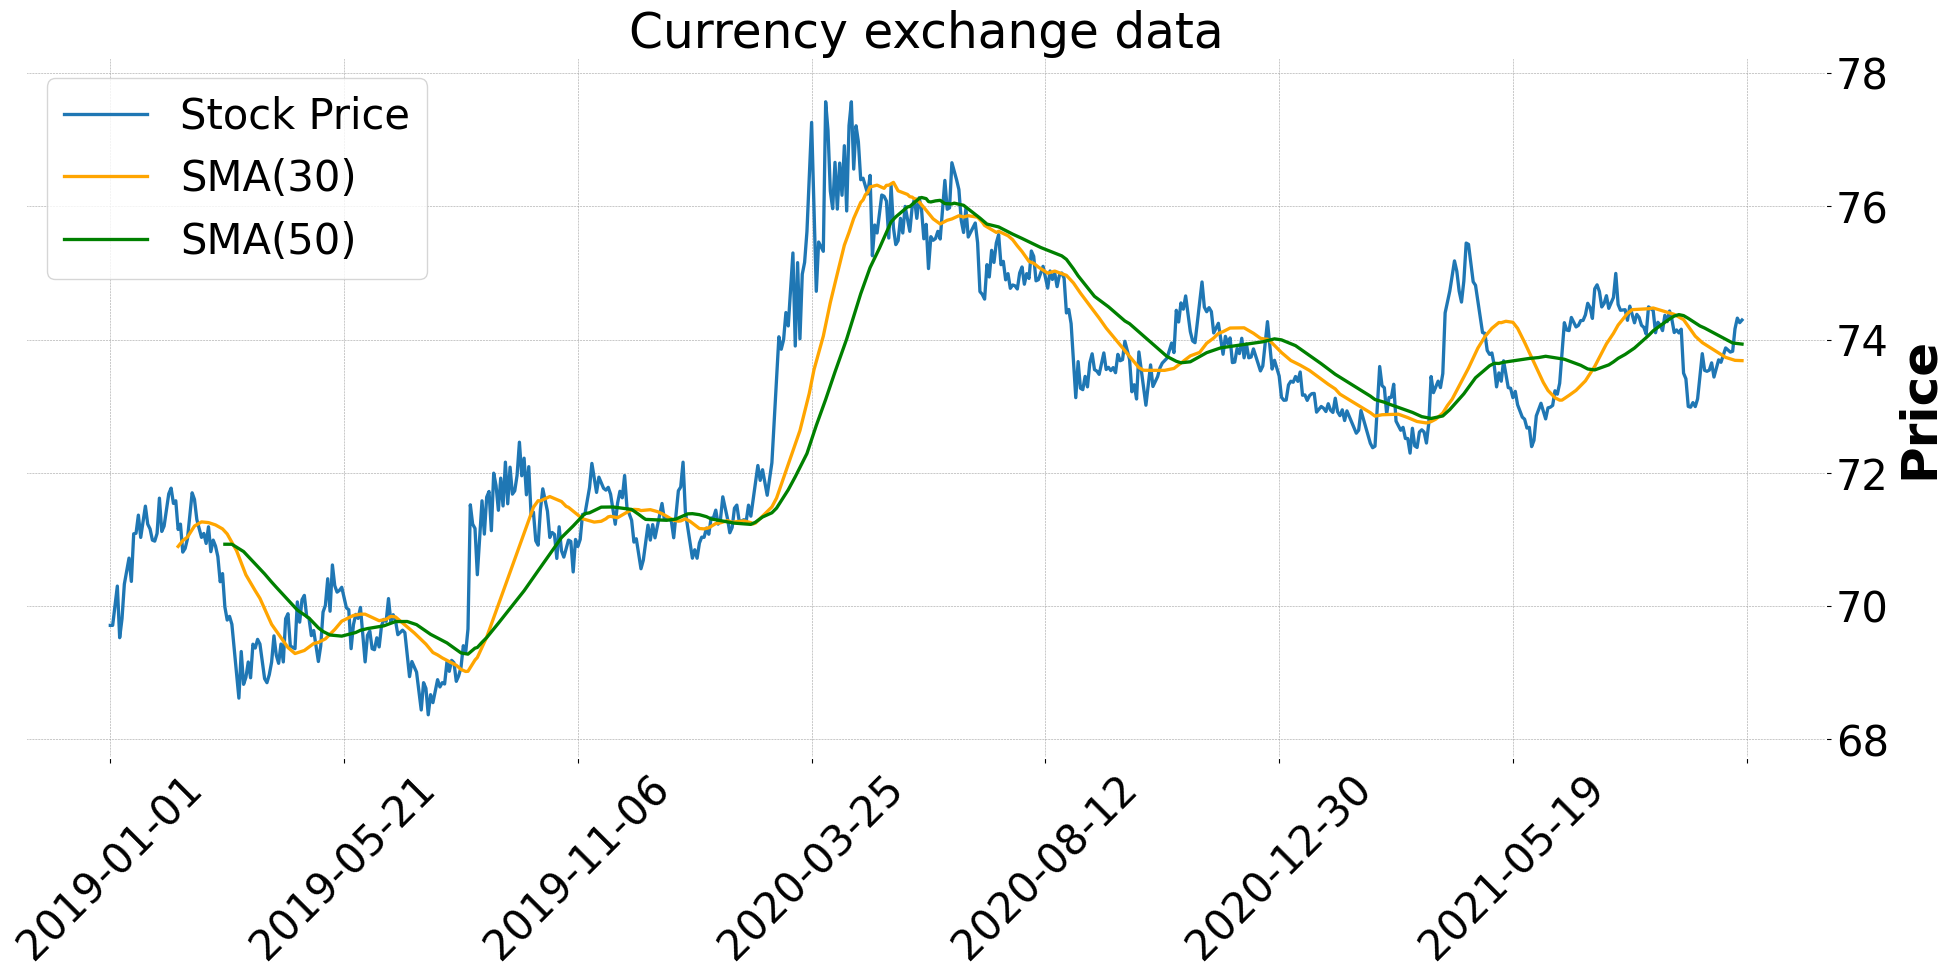

In [544]:
mystyle = mpf.make_mpf_style(base_mpf_style='charles',rc={'font.size':30})
fig,ax=mpf.plot(Data_Curr_exchange,type='line',mav=(30,50),mavcolors=('orange', 'green'),datetime_format='%Y-%m-%d',figsize=(25, 10),returnfig=True,scale_width_adjustment=dict(lines=3),style=mystyle)
ax[0].legend(['Stock Price','SMA(30)','SMA(50)'],fontsize=30)
ax[0].set_title('Currency exchange data', fontsize=35)
  #ax[0].tick_params(axis='y', which='both', labelsize=25)
plt.savefig('Currency exchange data.png',bbox_inches='tight')
plt.show()

In [494]:
#calculate the daily return rate without currency exchange value
def Plot_DOR(Data,text):
  plt.figure(figsize = (14, 7))
  Data['Daily return'].hist(bins = 200)
  plt.title(f'Return rate of {text}',fontsize=40)
  plt.xticks(fontsize=30)
  plt.yticks(fontsize=30)
  plt.xlabel('Return rate with INR to USD conversion',fontsize=30)
  plt.ylabel('Count',fontsize=30)
  plt.savefig(f'{text} return.png',bbox_inches='tight')
def Daily_return(Data,text,currency):
  DOR=pd.DataFrame((Data['Close']/currency['Close'])/(Data['Close'].shift(1)/currency['Close'].shift(1))-1)
  DOR.rename(columns = {'Close':'Daily return'}, inplace = True)
  Plot_DOR(DOR,text)
  return DOR
def plot_risk(RR):
  colors=[]
  c = colormaps.get_cmap('YlGnBu')
  scaled_data = (RR-RR.min())/(RR.max() - RR.min())
  for decimal in scaled_data['Standard Deviation']:
    colors.append(c(decimal))
  fig, ax = plt.subplots(figsize=(14,7))
  bars = ax.bar(RR.index, RR['Standard Deviation'],color=colors)
  ax.set_title('Comparison of risk across companies',fontsize=40)
  ax.set_xlabel('Company',fontsize=20)
  ax.set_ylabel('Risk (Standard deviation)',fontsize=20)
  ax.tick_params(axis='x',labelsize=30,rotation=90)
  ax.tick_params(axis='y',labelsize=30)
  plt.savefig('Risk.png',bbox_inches='tight')

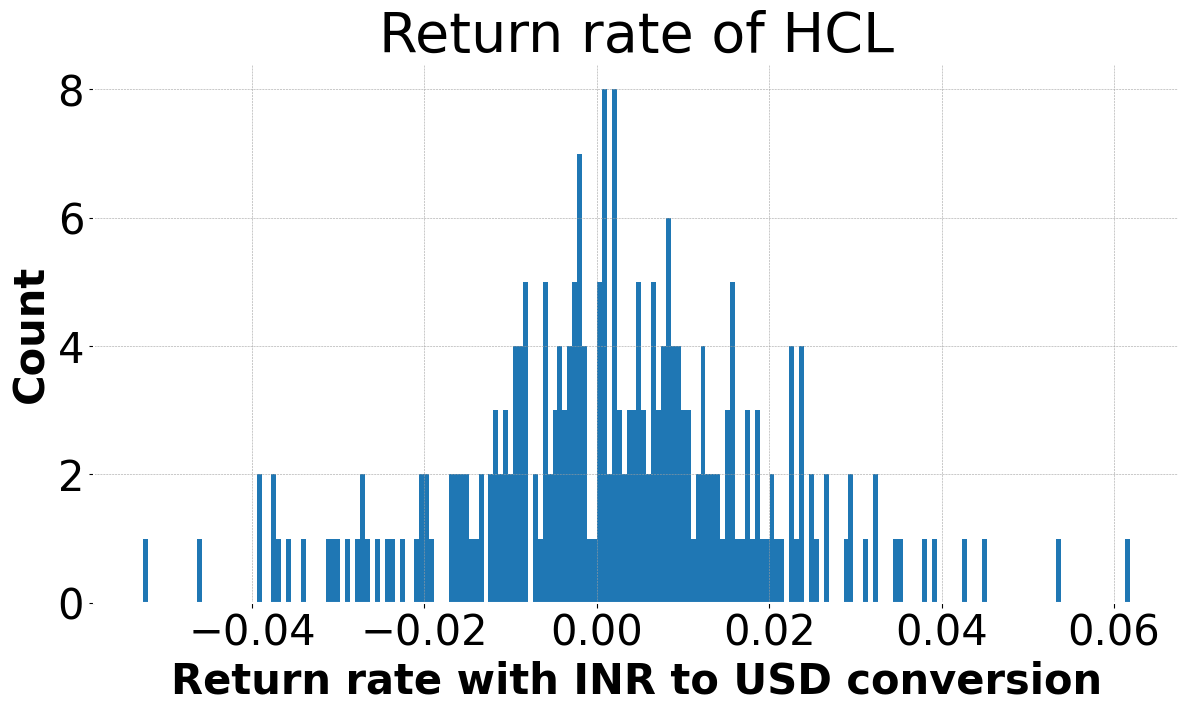

In [495]:
HCL_return_rate=Daily_return(Data_HCL,'HCL',Data_Curr_exchange)

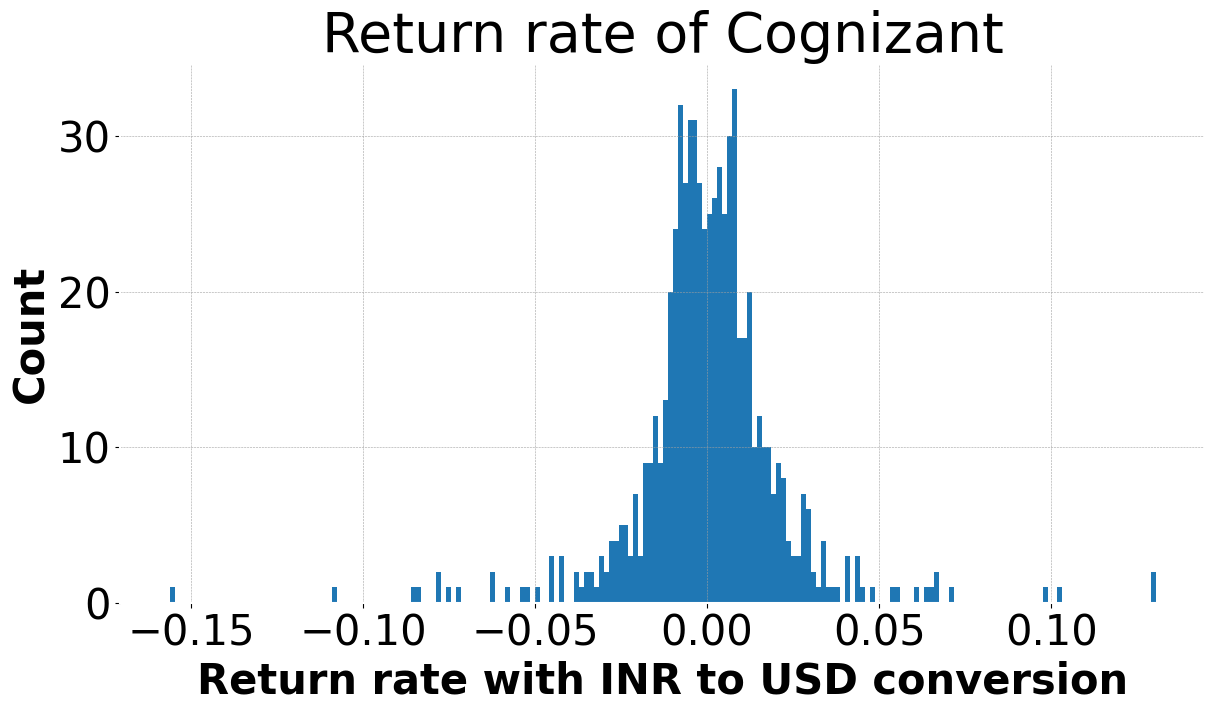

In [496]:
Cognizant_return_rate=Daily_return(Data_cognizant,'Cognizant',Data_Curr_exchange)

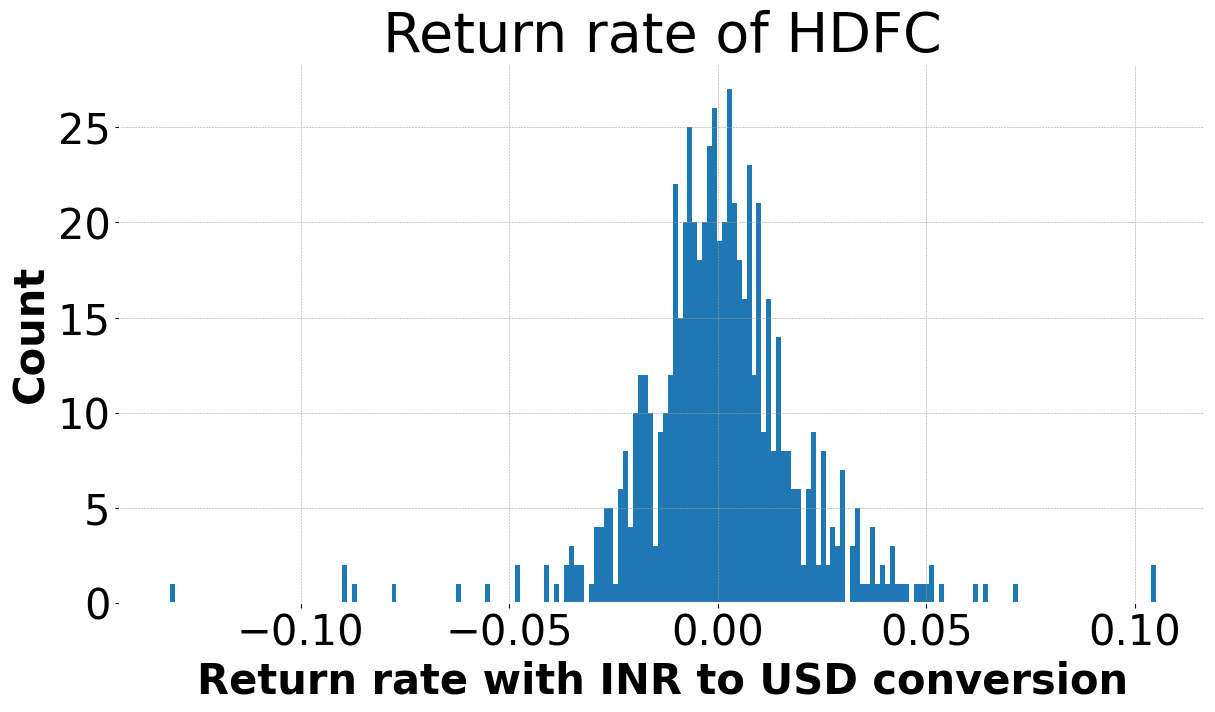

In [497]:
HDFC_return_rate=Daily_return(Data_HDFC,'HDFC',Data_Curr_exchange)

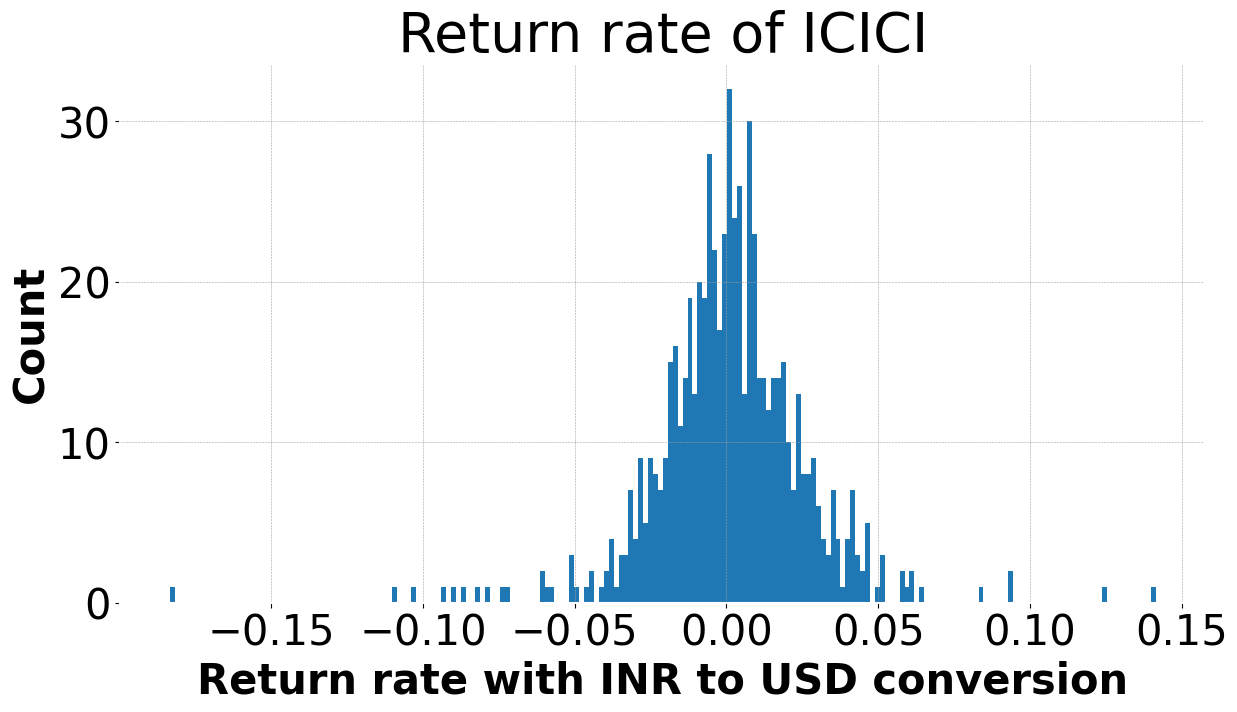

In [498]:
ICICI_return_rate=Daily_return(Data_ICICI,'ICICI',Data_Curr_exchange)

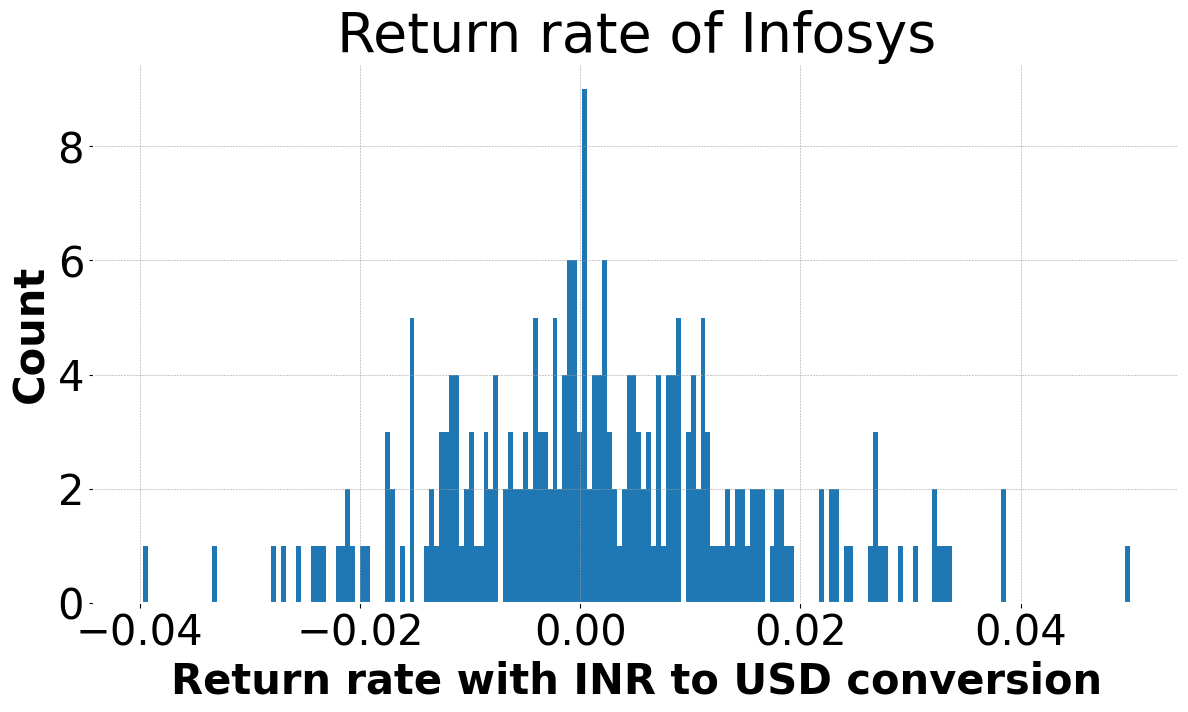

In [499]:
Infosys_return_rate=Daily_return(Data_Infosys,'Infosys',Data_Curr_exchange)

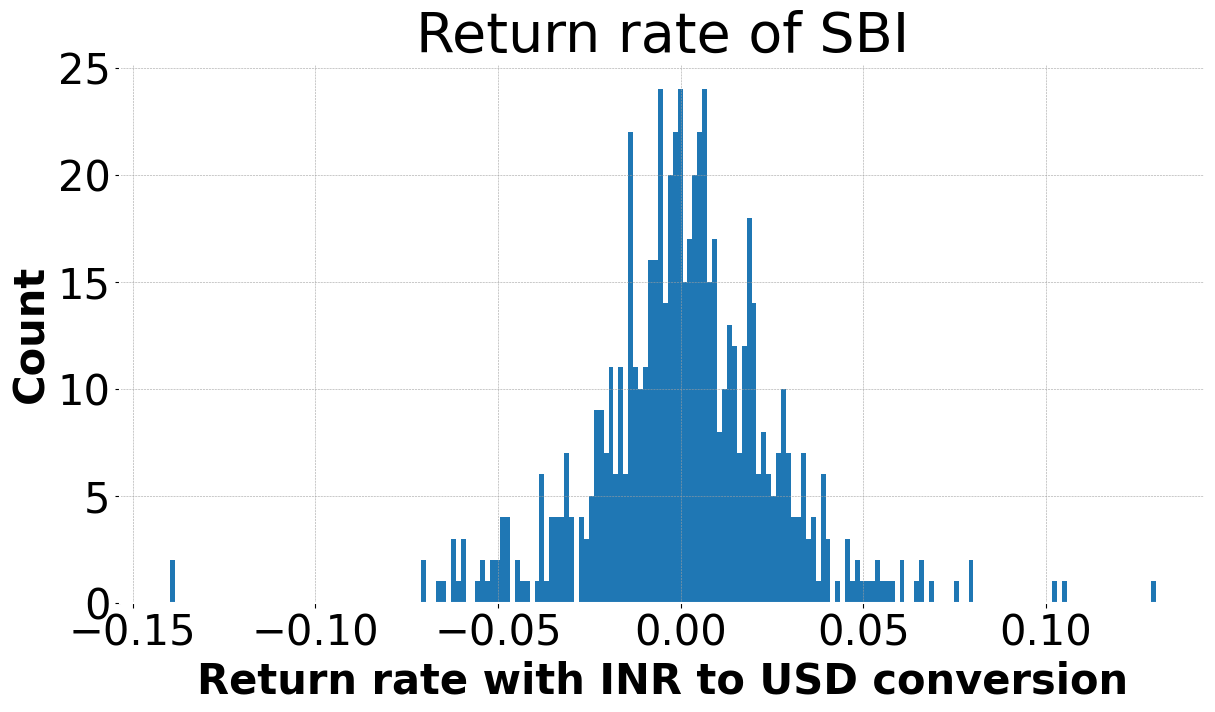

In [500]:
SBI_return_rate=Daily_return(Data_SBI,'SBI',Data_Curr_exchange)

In [501]:
D=[Infosys_return_rate.std().values[0],HCL_return_rate.std().values[0],Cognizant_return_rate.std().values[0],HDFC_return_rate.std().values[0],
                        SBI_return_rate.std().values[0],ICICI_return_rate.std().values[0]]
Risk=pd.DataFrame(data=D,index=['Infosys','HCL','Cognizant','HDFC','SBI','ICICI'],columns=['Standard Deviation'])
Risk=Risk.sort_values('Standard Deviation')

In [502]:
Risk

Standard Deviation
Infosys              0.013871
HCL                  0.017250
HDFC                 0.019889
Cognizant            0.021741
SBI                  0.025592
ICICI                0.025641

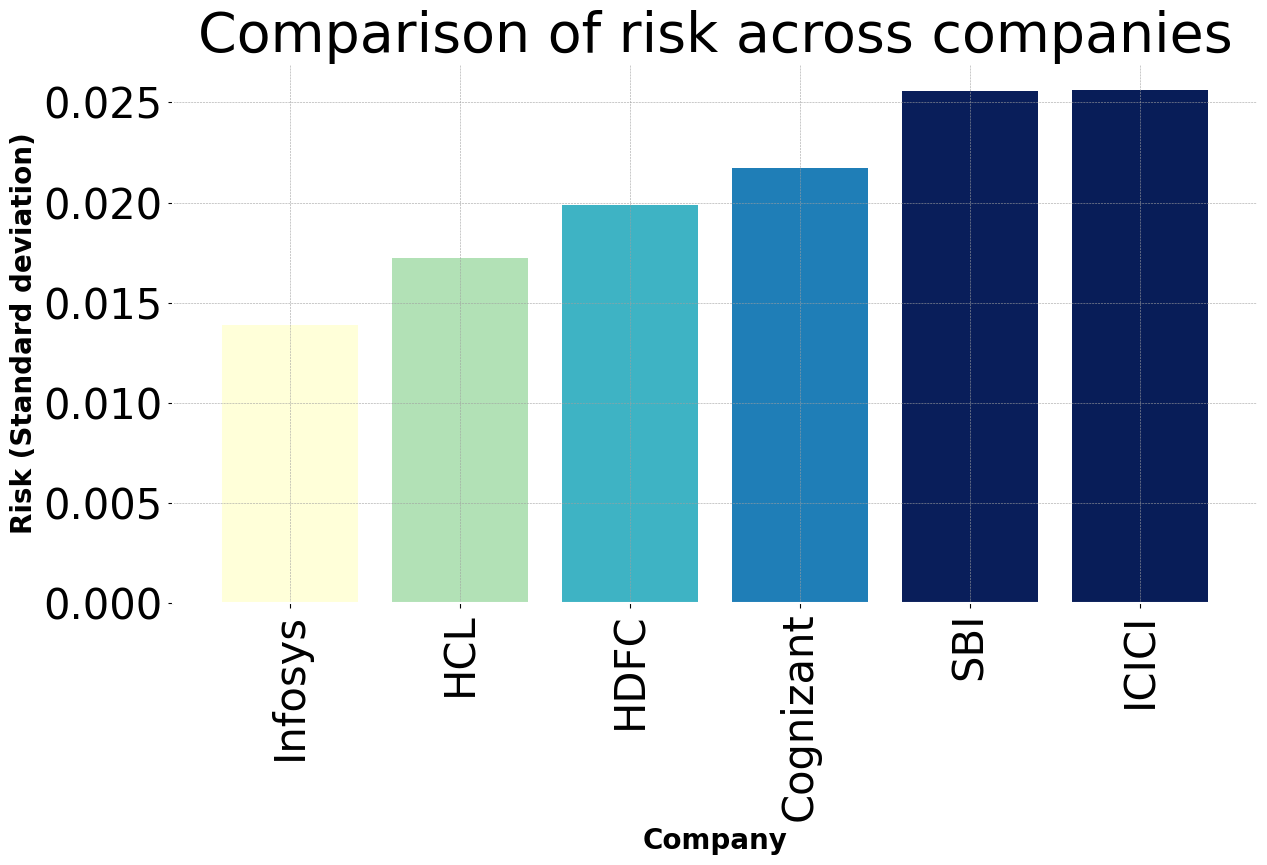

In [503]:
plot_risk(Risk)

In [504]:
#Check for stationarity
# From now onwards only focus will be given to Closing price
Infosys_close=copy.deepcopy(Data_Infosys[['Close']])
Infosys_close.rename(columns = {'Close':'Infosys Close'},inplace=True)
HCL_close=copy.deepcopy(Data_HCL[['Close']])
HCL_close.rename(columns = {'Close':'HCL Close'},inplace=True)
Cognizant_close=copy.deepcopy(Data_cognizant[['Close']])
Cognizant_close.rename(columns = {'Close':'Cognizant Close'},inplace=True)
SBI_close=copy.deepcopy(Data_SBI[['Close']])
SBI_close.rename(columns = {'Close':'SBI Close'},inplace=True)
ICICI_close=copy.deepcopy(Data_ICICI[['Close']])
ICICI_close.rename(columns = {'Close':'ICICI Close'},inplace=True)
HDFC_close=copy.deepcopy(Data_HDFC[['Close']])
HDFC_close.rename(columns = {'Close':'HDFC Close'},inplace=True)

In [505]:
Combined_data=reduce(lambda  left,right: pd.merge(left,right,how='inner',left_index=True,right_index=True),[Infosys_close,HCL_close,Cognizant_close,SBI_close,ICICI_close,HDFC_close])

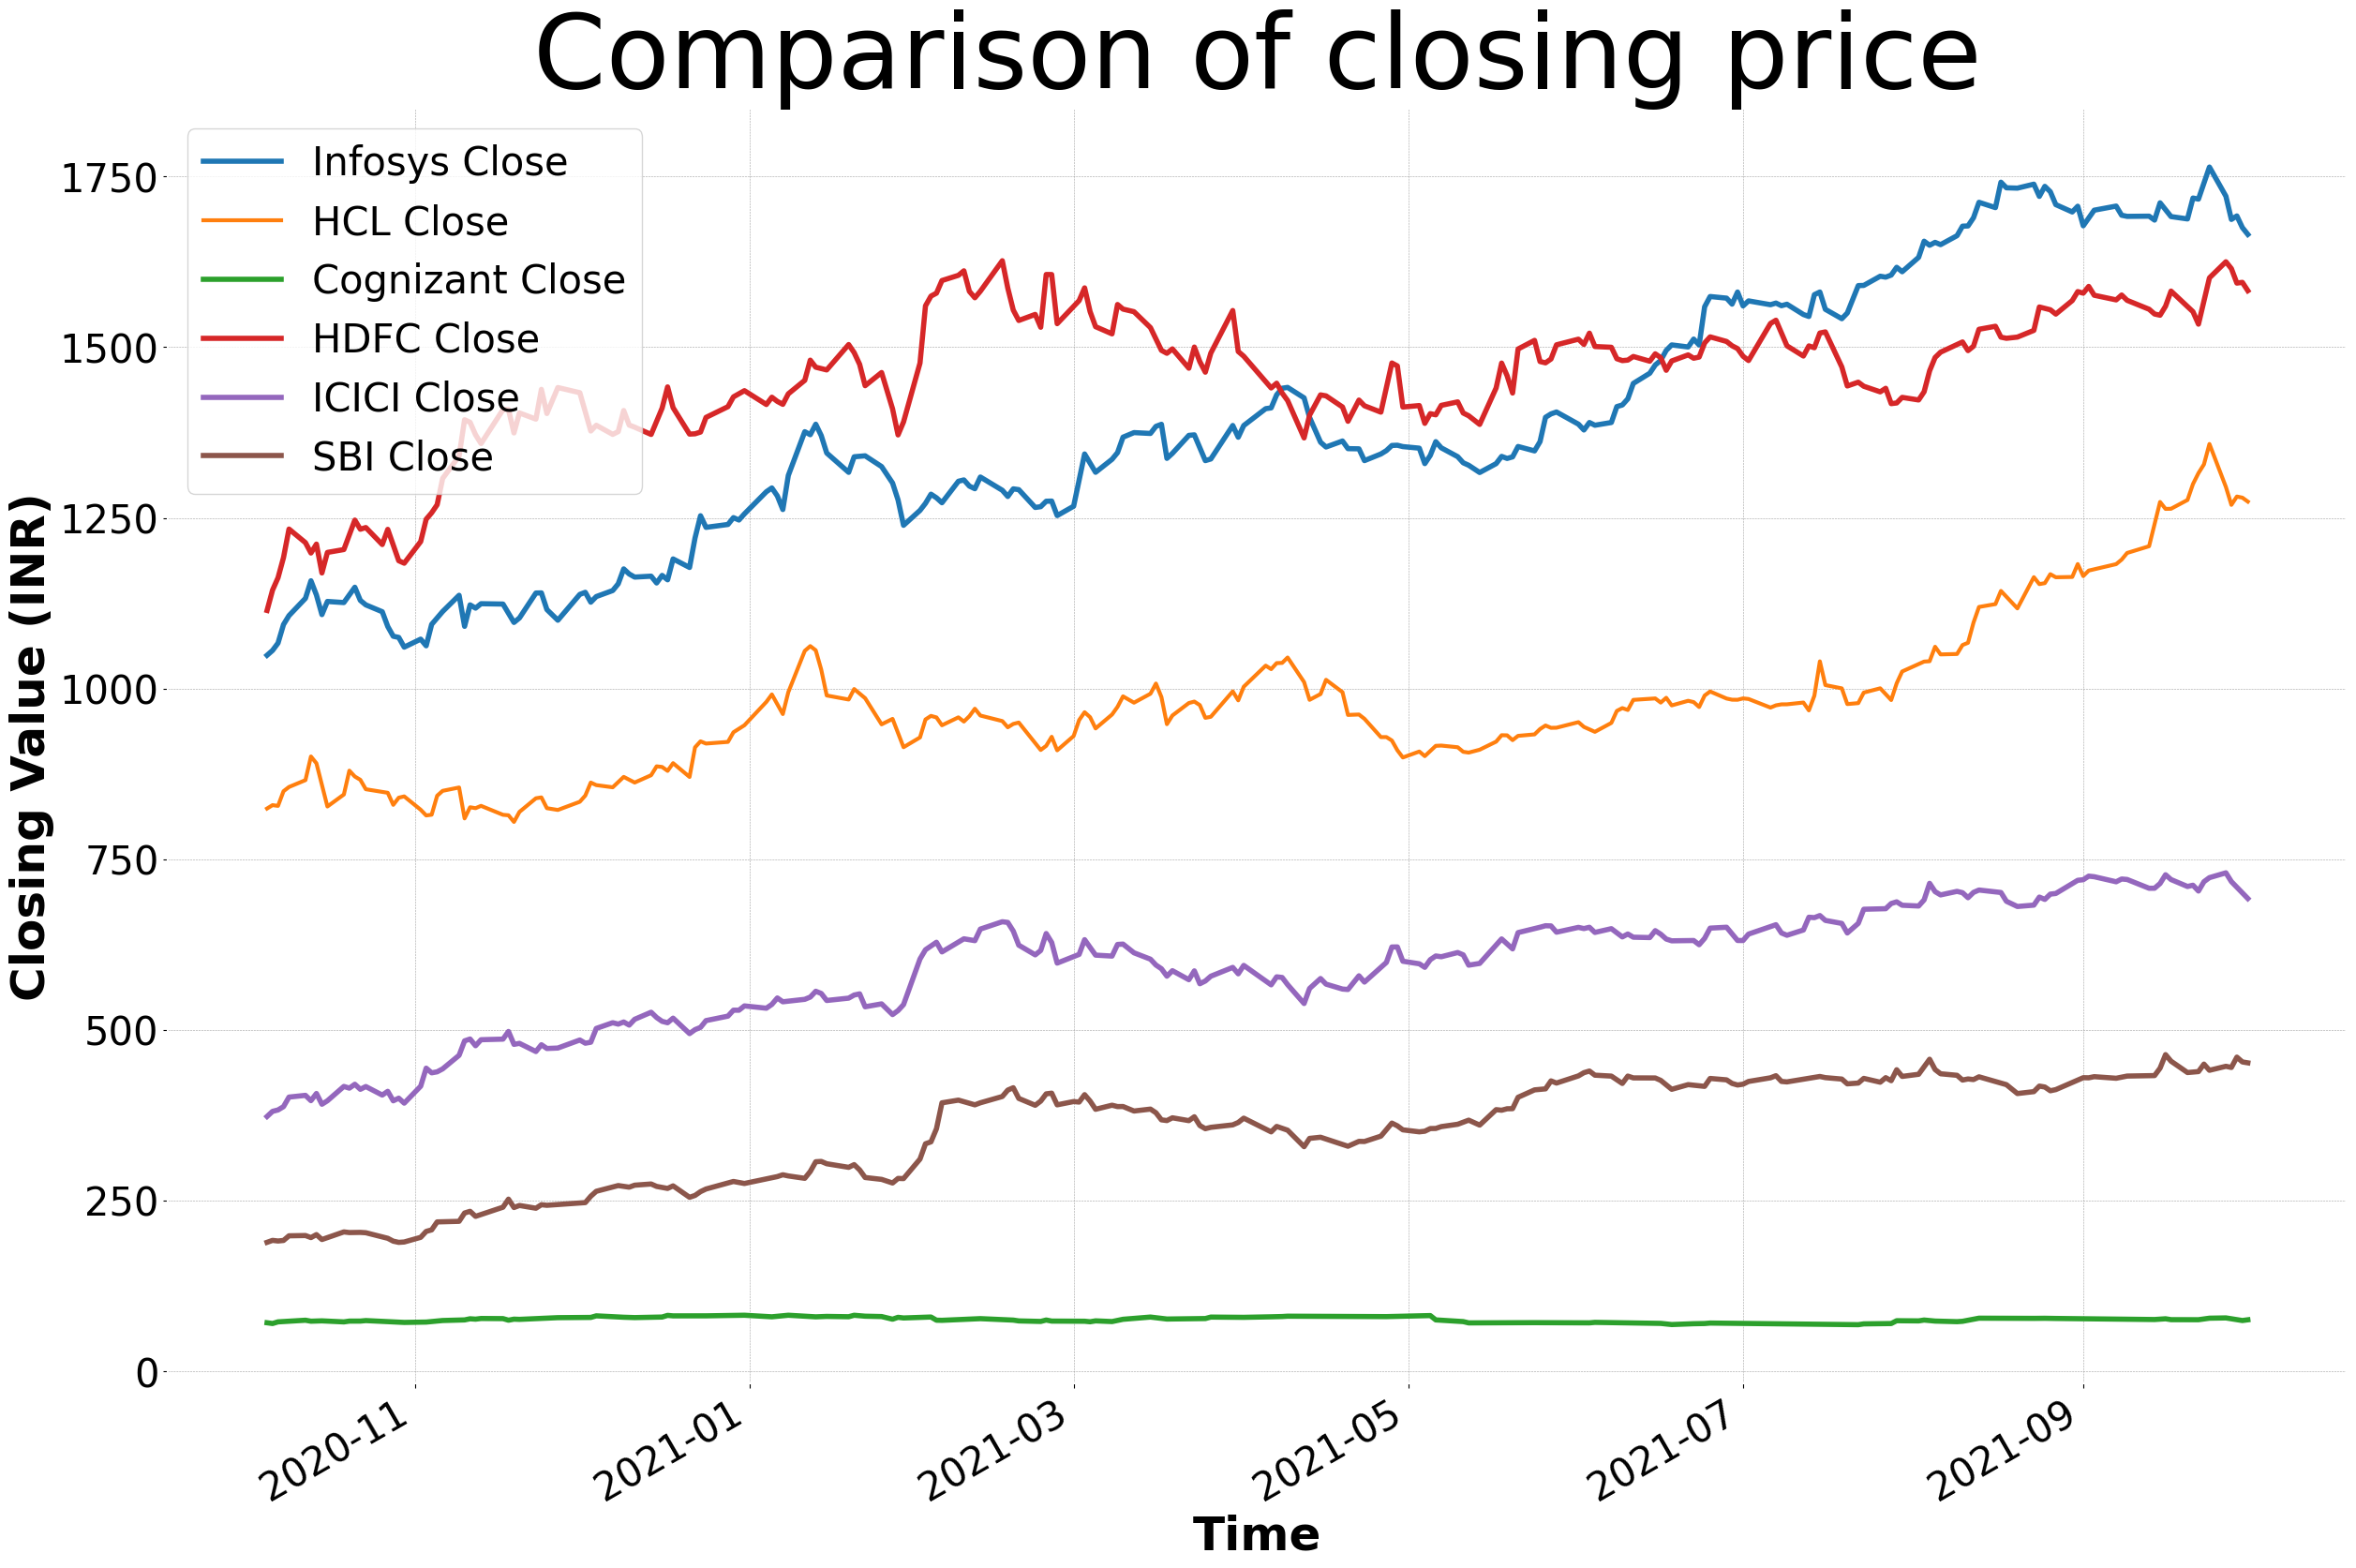

In [506]:
plt.figure(figsize=(30,20))
plt.title("Comparison of closing price",fontsize=80)
Combined_data['Infosys Close'].plot(legend=True,lw=4)
Combined_data['HCL Close'].plot(legend=True,lw=3)
Combined_data['Cognizant Close'].plot(legend=True,lw=4)
Combined_data['HDFC Close'].plot(legend=True,lw=4)
Combined_data['ICICI Close'].plot(legend=True,lw=4)
Combined_data['SBI Close'].plot(legend=True,lw=4)
plt.ylabel('Closing Value (INR)')
plt.xlabel('Time')
plt.savefig('Combined_close.png',bbox_inches='tight')
plt.show()

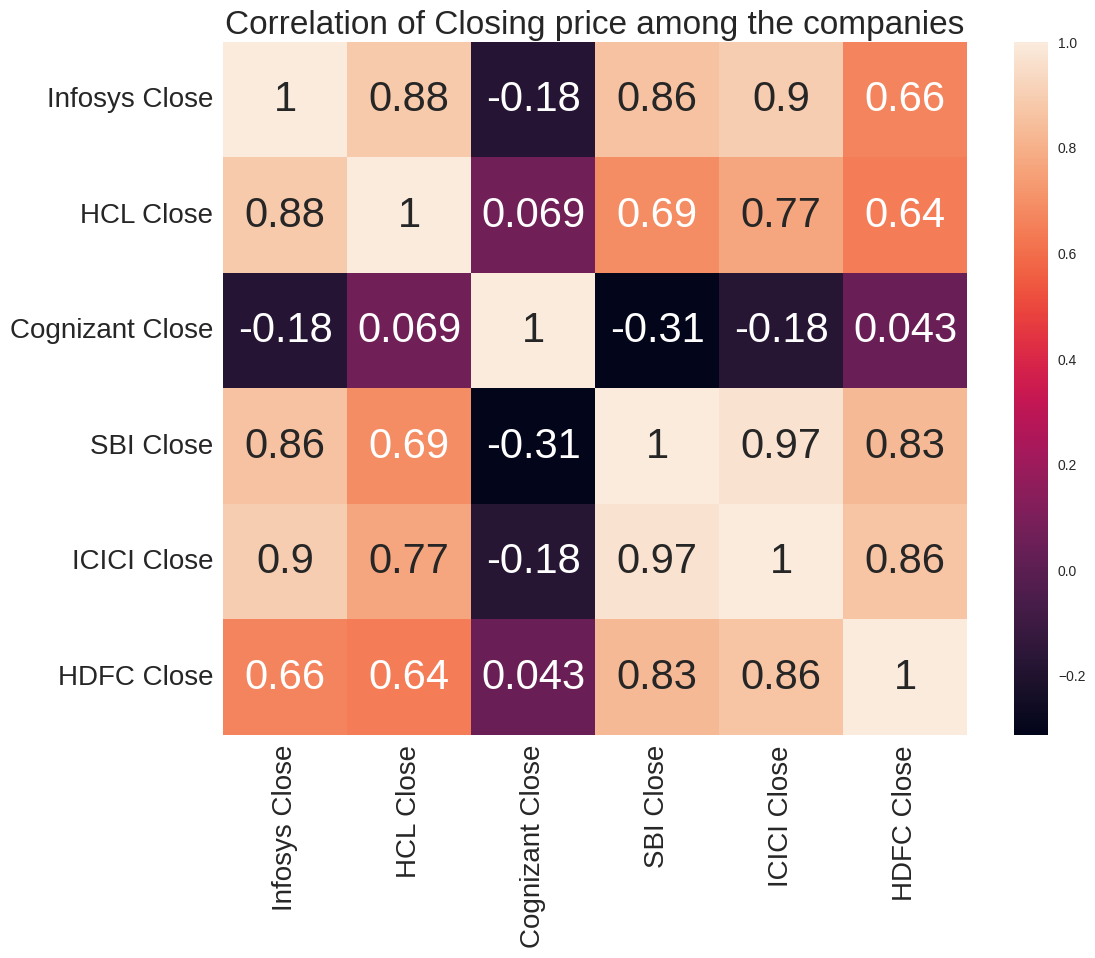

In [507]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12,9))
plt.title("Correlation of Closing price among the companies",fontsize=24)
sns.heatmap(Combined_data.corr(),annot=True)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.show()

We see the risk is less and closing price of Infosys is higher than any other companies. So by investors may be more interested in investing in Infosys. So we will consider the modelling part only for Infosys

## Modeling

In [508]:
#Test for stationarity of closing price of Infosys
print('p value for Infosys: ',adfuller(Infosys_close.values)[1])
print('p value for HCL: ',adfuller(HCL_close.values)[1])
print('p value for Cognizant: ',adfuller(Cognizant_close.values)[1])
print('p value for ICICI: ',adfuller(SBI_close.values)[1])
print('p value for HDFC: ',adfuller(HDFC_close.values)[1])

p value for Infosys:  0.772129858462079
p value for HCL:  0.9752910000168649
p value for Cognizant:  0.25317145678908437
p value for ICICI:  0.8149816450211009
p value for HDFC:  0.7261646925917381


At 5% significance level none of the dataset is stationary.

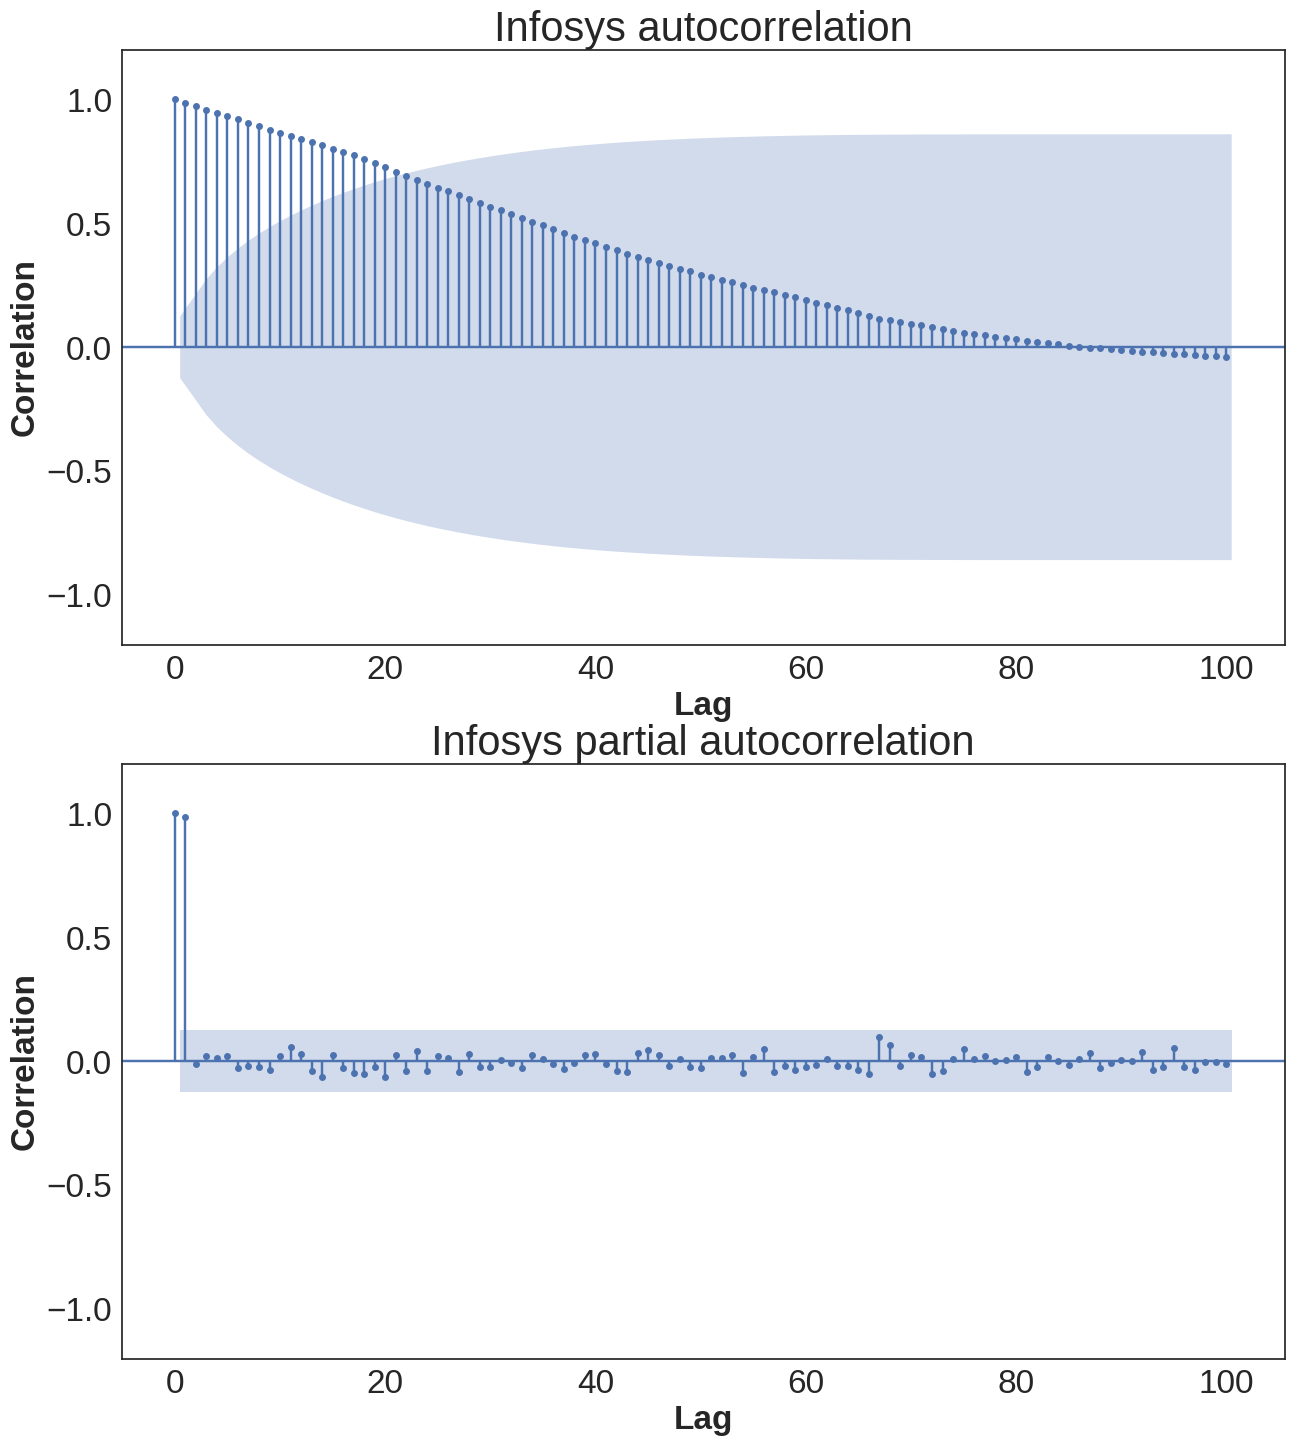

In [509]:
plt.style.use('seaborn-v0_8-white')
fig,ax=plt.subplots(nrows=2, ncols=1, figsize=(15, 17))
plot_acf(Infosys_close,lags=100,ax=ax[0])
plot_pacf(Infosys_close,lags=100,ax=ax[1])
ax[0].set_title('Infosys autocorrelation',fontsize=30)
ax[0].set_xlabel('Lag',fontsize=24)
ax[0].set_ylabel('Correlation',fontsize=24)
ax[0].tick_params(axis='both',labelsize=24)
ax[0].set_ylim(-1.2,1.2)
ax[1].set_title('Infosys partial autocorrelation',fontsize=30)
ax[1].set_ylabel('Correlation',fontsize=24)
ax[1].set_xlabel('Lag',fontsize=24)
ax[1].tick_params(axis='both',labelsize=24)
ax[1].set_ylim(-1.2,1.2)
plt.show()

#Split the data into train test

In [510]:
training_data_len = int(np.ceil( len(Infosys_close) * .80 ))
train = Infosys_close.iloc[:training_data_len]
test = Infosys_close.iloc[training_data_len:]

In [511]:
model = pm.auto_arima(train.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                                     # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      with_intercept=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1716.715, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1718.621, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1718.885, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1718.325, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1720.964, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1719.041, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1719.109, Time=1.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1717.379, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1717.313, Time=0.77 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1720.990, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1718.746, Time=0.29 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.396 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

So p=1,q=1,d=1

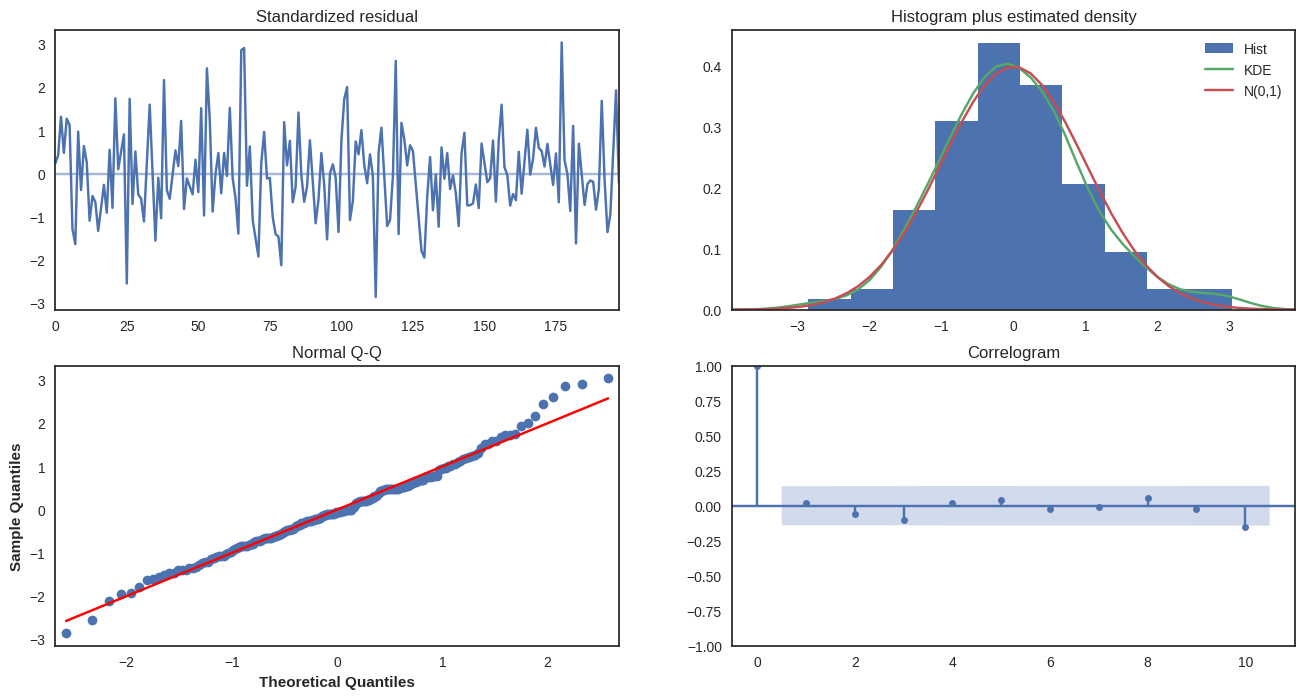

In [512]:
plt.style.use('seaborn-v0_8-white')
model.plot_diagnostics(figsize=(16,8))
plt.show()

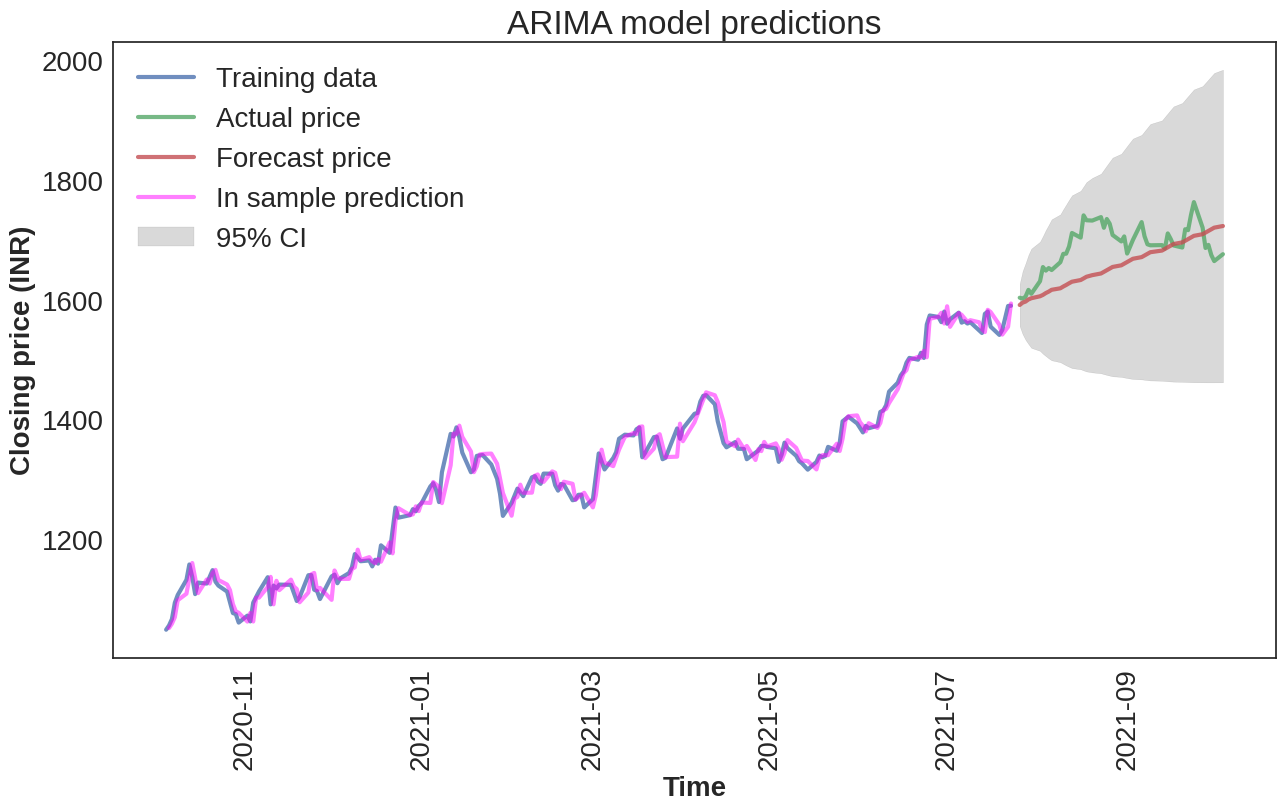

In [541]:
#Auto-ARIMA model
plt.style.use('seaborn-v0_8-white')
op, conf_int = model.predict(len(test),return_conf_int=True)
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)
fc_series = pd.Series(op, index=test.index)
predictions = model.predict_in_sample()
insam_series=pd.Series(predictions, index=train.index)
plt.figure(figsize=(15,8))
plt.plot(train, label='Training data',linewidth=3,alpha=0.8)
plt.plot(test, label='Actual price',linewidth=3,alpha=0.8)
plt.plot(fc_series, label='Forecast price',linewidth=3,alpha=0.8)
plt.plot(insam_series.loc['2020-10-06':],label='In sample prediction',color='magenta',linewidth=3,alpha=0.5)
plt.title('ARIMA model predictions',fontsize=24)
plt.ylabel('Closing price (INR)',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15,label='95% CI')
plt.legend(loc='upper left',fontsize=20)
plt.savefig('ARIMA prediction.png',bbox_inches='tight')
plt.show()

In [514]:
mse(test,op)**0.5# get the mean squared error

48.203094479758676

In [515]:
#Scale the data
S=StandardScaler()
scaled_train=S.fit_transform(train)
scaled_test=S.transform(test)

In [516]:
#Use a 60 day data window for training in sequence
Test_set_to_prediction=np.concatenate([scaled_train[-3:],scaled_test],axis=0)

## Generate the sequence data

In [517]:
window_size = 3
def windowed_dataset(series,batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series.reshape(-1,1))

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    #dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(len(series)).prefetch(1)

    return dataset

In [518]:
X,y=np.array(list(windowed_dataset(scaled_train,10))[0][0]),np.array(list(windowed_dataset(scaled_train,10))[0][1])
X_test,y_test=np.array(list(windowed_dataset(Test_set_to_prediction,10))[0][0]),np.array(list(windowed_dataset(Test_set_to_prediction,10))[0][1])

In [519]:
X_test.shape

(49, 3, 1)

In [520]:
Model1=Sequential(
[
    LSTM(units=128,input_shape=(X.shape[1],1),return_sequences=True),
    LSTM(units=60),
    Dense(units=1),
])

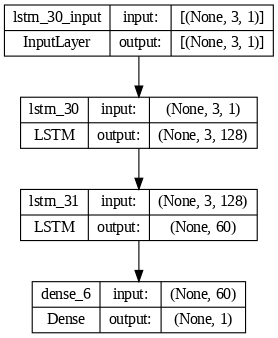

In [521]:
#Visualize the model
plot_model(Model1, show_shapes = True,expand_nested = True,dpi = 80)

In [522]:
Model1.compile(optimizer = "adam",loss='mean_squared_error')
Model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 3, 128)            66560     
                                                                 
 lstm_31 (LSTM)              (None, 60)                45360     
                                                                 
 dense_6 (Dense)             (None, 1)                 61        
                                                                 
Total params: 111981 (437.43 KB)
Trainable params: 111981 (437.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [523]:
callbacks=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True)
history=Model1.fit(X,y,epochs=300,validation_data=(X_test,y_test),callbacks=[callbacks],verbose=2)

Epoch 1/300
7/7 - 8s - loss: 0.8528 - val_loss: 4.4647 - 8s/epoch - 1s/step
Epoch 2/300
7/7 - 0s - loss: 0.4997 - val_loss: 1.6676 - 86ms/epoch - 12ms/step
Epoch 3/300
7/7 - 0s - loss: 0.1629 - val_loss: 0.0640 - 99ms/epoch - 14ms/step
Epoch 4/300
7/7 - 0s - loss: 0.0469 - val_loss: 0.0480 - 102ms/epoch - 15ms/step
Epoch 5/300
7/7 - 0s - loss: 0.0802 - val_loss: 0.0364 - 91ms/epoch - 13ms/step
Epoch 6/300
7/7 - 0s - loss: 0.0403 - val_loss: 0.1090 - 82ms/epoch - 12ms/step
Epoch 7/300
7/7 - 0s - loss: 0.0418 - val_loss: 0.0852 - 90ms/epoch - 13ms/step
Epoch 8/300
7/7 - 0s - loss: 0.0397 - val_loss: 0.0466 - 104ms/epoch - 15ms/step
Epoch 9/300
7/7 - 0s - loss: 0.0371 - val_loss: 0.0627 - 93ms/epoch - 13ms/step
Epoch 10/300
7/7 - 0s - loss: 0.0376 - val_loss: 0.0946 - 92ms/epoch - 13ms/step
Epoch 11/300
7/7 - 0s - loss: 0.0369 - val_loss: 0.1174 - 99ms/epoch - 14ms/step
Epoch 12/300
7/7 - 0s - loss: 0.0368 - val_loss: 0.0776 - 100ms/epoch - 14ms/step
Epoch 13/300
7/7 - 0s - loss: 0.0366 -

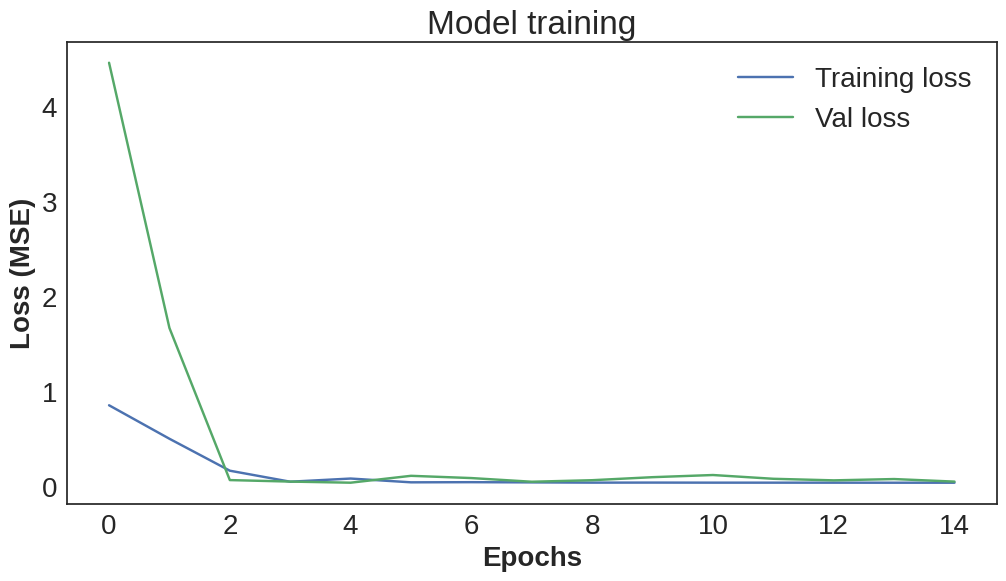

In [542]:
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(12,6))
plt.title('Model training',fontsize=24)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Val loss')
plt.ylabel('Loss (MSE)',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('Model training.png',bbox_inches='tight')
plt.show()

In [532]:
predictions = Model1.predict(X_test)
predictions = S.inverse_transform(predictions)
train_pred=S.inverse_transform(Model1.predict(X))

7/7 [==============================] - 0s 6ms/step


In [528]:
mse(test,predictions)**0.5 # RMSE of LSTM prediction

27.091381416981854

In [538]:
LSTM_pred_series=pd.Series(predictions.reshape(-1), index=test.index)

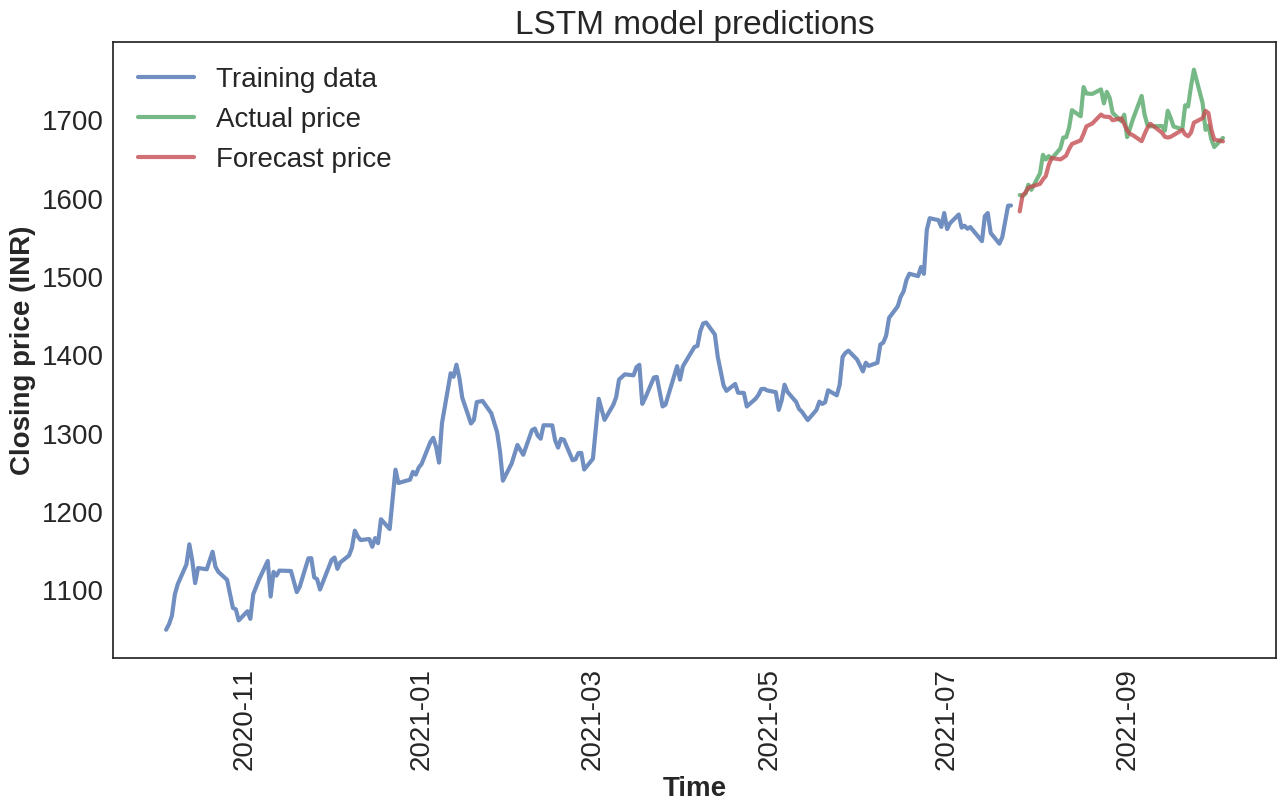

In [540]:
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(15,8))
plt.plot(train, label='Training data',linewidth=3,alpha=0.8)
plt.plot(test, label='Actual price',linewidth=3,alpha=0.8)
plt.plot(LSTM_pred_series, label='Forecast price',linewidth=3,alpha=0.8)
plt.title('LSTM model predictions',fontsize=24)
plt.ylabel('Closing price (INR)',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left',fontsize=20)
plt.savefig('LSTM prediction.png',bbox_inches='tight')
plt.show()

# End of Code